# PERSONAL HEALTH

_Portfolio project by Andrei Khaletckii_

## ABOUT ME




<img src='data/profile_photo.jpg' width='300' />

Hello! My name is Andrei Khaletckii, I am 33 years old and living in Valencia, Spain with my wife and two kids.

In 2011 I got my degree of engineer of information systems and technologies at Moscow Technical University of Communication and Informatics. I was all into IT but felt that a lack of concentration and life skills to focus on a specific area and to do the job well.

So I followed my gut feeling and converted my passion for exercise in a fitness job. Throughout the next 11 years I went from being a group class instructor, through CrossFit and strength training and finally to health coaching using the highest health industry standards and competing from time to time.

In November 2022 the circle closed: working with my clients' health data I realized that I am ready to switch fields and dive into pure data analytics. With a solid personal health foundation and accumulated knowledge I started my education journey with refreshing the basics of statistics, building up Python programming skills and practicing various tools like pandas, seaborn and SQL.

As of May 2023, I am searching for a data analyst position in health-related industry as here I see myself most confident and thus useful as employee.

## INTRODUCTION

<p>As an amateur athlete, I've always been interested in my performance. 
In September 2021 I started wearing Xiaomi Mi Band to track my sleep and activity. With time I started having doubts in the quality of sleep data my band provided as it often had little in common with my actual perception of recovery. So in December 2022 I decided to try wearing another wearable proven by many CrossFit athletes, a Whoop band.

<img src='data/two_bands.png' width='600' />
    
The difference in sleep analysis data was evident and so I continued the experiment in order to compare the bands futher.

In early April 2023 I started noticing accumulated fatigue and found it reflected in an ascending resting heart rate trend for 4 month in a row. 

As an adaptation to regular and vigorous endurance training I expect to see 39-40 bpm at rest but now 45-47 bpm seemed to become my new normal.

Curiosity has lead me to make up this project. In order to find the reason for such a substantial change, I exported the data from two fitness bands and combined it with my workout log.



## <a id='#anasylis'></a> ANALYSIS


In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os

from operator import itemgetter

pd.options.display.max_columns = None

current_dir = os.getcwd()
current_dir

'/private/var/mobile/Containers/Data/Application/30B2249C-C2F2-417E-AC1E-EA52218C2101/Documents/PersonalHealth'

## DATA IMPORT, CLEANING AND PREPARATION FOR ANALYSIS

We can suppose that the files from Mi Band and Whoop are relatively "clean" due to the nature of their data.

By contrast, workout log was created by manual typing each workout session and thus, despite all my efforts to keep records standartized, may contain format errors.

Let's see if it's true in practice.

### Xiaomi Mi Band data import

There are total of 4 files that may interest us: 
\
`heartrate.csv`\
`sport.csv`\
`sleeps.csv`\
`activity.csv`

In [103]:
# setting the working directory

mb_data_dir = os.path.join(current_dir, 'data/miband')

#### __`heartrate.csv` → `mb_heartrate`__

Contents: heart rate measurements.

Sampling frequency: multiple times a day.


In [104]:
mb_heartrate = pd.read_csv(os.path.join(mb_data_dir, 'heartrate.csv'),
                        parse_dates=[0],
                       dtype={2:int},
                       header=0,
                        names=['date', 'time', 'hr'],
                          )

mb_heartrate['time'] = pd.to_datetime(mb_heartrate['time'], format='%H:%M')
mb_heartrate.head()

,date,time,hr
0,2021-09-17,1900-01-01 23:32:00,43
1,2021-09-17,1900-01-01 23:33:00,42
2,2021-09-17,1900-01-01 23:34:00,42
3,2021-09-17,1900-01-01 23:35:00,52
4,2021-09-17,1900-01-01 23:37:00,44


In [105]:
mb_heartrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694198 entries, 0 to 694197
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    694198 non-null  datetime64[ns]
 1   time    694198 non-null  datetime64[ns]
 2   hr      694198 non-null  int64         
dtypes: datetime64[ns](2), int64(1)
memory usage: 15.9 MB



#### __`sport.csv` → `mb_workouts`__

Contents: logged workouts and metrics like pace, distance and calories burned.

Sampling frequency: zero to multiple times a day.


In [106]:
mb_workouts = pd.read_csv(os.path.join(mb_data_dir, 'sport.csv'),
                      parse_dates=[1])

mb_workouts.head()

,type,startTime,sportTime(s),maxPace(/meter),minPace(/meter),distance(m),avgPace(/meter),calories(kcal)
0,16,2023-04-18 13:24:24+00:00,479,0.0,1.8,0.0,0.0,43.0
1,49,2023-04-18 12:30:33+00:00,2160,0.0,1.8,0.0,0.0,401.0
2,16,2023-04-17 11:49:53+00:00,4459,0.0,1.8,0.0,0.0,588.0
3,49,2023-04-16 11:01:30+00:00,165,0.0,1.8,0.0,0.0,30.0
4,16,2023-04-16 10:57:37+00:00,18,0.0,1.8,0.0,0.0,1.0


In [107]:
mb_workouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   type             649 non-null    int64              
 1   startTime        649 non-null    datetime64[ns, UTC]
 2   sportTime(s)     649 non-null    int64              
 3   maxPace(/meter)  649 non-null    float64            
 4   minPace(/meter)  649 non-null    float64            
 5   distance(m)      649 non-null    float64            
 6   avgPace(/meter)  649 non-null    float64            
 7   calories(kcal)   649 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(5), int64(2)
memory usage: 40.7 KB



#### `activity.csv` → `mb_steps`

Contents: totals of daily steps.

Sampling frequency: once a day.

In [108]:
mb_steps = pd.read_csv(os.path.join(mb_data_dir, 'activity.csv'),
                      usecols=['date','steps'],
                      parse_dates=['date'])

mb_steps.head()

,date,steps
0,2021-09-17,114
1,2021-09-18,9793
2,2021-09-19,6865
3,2021-09-20,12289
4,2021-09-21,9137


In [109]:
mb_steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    580 non-null    datetime64[ns]
 1   steps   580 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 9.2 KB



#### __`sleeps.csv` → `mb_sleep`__

Contents: info on total sleep time and its respective phase durations.

Sampling frequency: once a day.


In [110]:
mb_sleep = pd.read_csv(os.path.join(mb_data_dir, 'sleep.csv'),
                      usecols=[0,1,2,3,4,5,6],
                      parse_dates=[0,4,5])

mb_sleep.head()

,date,deepSleepTime,shallowSleepTime,wakeTime,start,stop,REMTime
0,2021-09-17,0,0,0,2021-09-17 21:00:00+00:00,2021-09-17 21:00:00+00:00,0
1,2021-09-18,169,192,36,2021-09-17 20:16:00+00:00,2021-09-18 04:07:00+00:00,74
2,2021-09-19,86,234,0,2021-09-18 20:17:00+00:00,2021-09-19 03:07:00+00:00,90
3,2021-09-20,94,227,26,2021-09-19 19:46:00+00:00,2021-09-20 03:04:00+00:00,91
4,2021-09-21,91,263,6,2021-09-20 19:51:00+00:00,2021-09-21 02:48:00+00:00,57


In [111]:
mb_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   date              580 non-null    datetime64[ns]     
 1   deepSleepTime     580 non-null    int64              
 2   shallowSleepTime  580 non-null    int64              
 3   wakeTime          580 non-null    int64              
 4   start             580 non-null    datetime64[ns, UTC]
 5   stop              580 non-null    datetime64[ns, UTC]
 6   REMTime           580 non-null    int64              
dtypes: datetime64[ns, UTC](2), datetime64[ns](1), int64(4)
memory usage: 31.8 KB


In [112]:
mb_sleep['date'].value_counts()

2021-09-17    1
2022-09-15    1
2022-10-05    1
2022-10-06    1
2022-10-07    1
             ..
2022-03-29    1
2022-03-30    1
2022-03-31    1
2022-04-01    1
2023-04-19    1
Name: date, Length: 580, dtype: int64

✅ Everything seems to be fine here.

### Whoop data import

There are total of 4 files that may interest us: 
\
`metrics.csv`\
`heartrate.csv`\
`recoveries.csv`\
`sleep.csv`

In [113]:
wh_data_dir = os.path.join(current_dir, 'data/whoop/')

#### __`metrics.csv` → `wh_heartrate`__ 

Contents: heart rate and acceleration measurements.

Sampling frequency: multiple times a day

In [114]:
# collecting filenames with metrics

wh_heartrate_filenames = [filename 
                     for filename in os.listdir(wh_data_dir)
                    if 'metrics' in filename]

# reading in the metrics filenames

wh_heartrate_dfs = []

for filename in wh_heartrate_filenames:
    wh_heartrate_dfs.append(pd.read_csv(os.path.join(wh_data_dir, filename)))
    
# concatenating all metrics files into a single df

wh_heartrate = pd.concat(wh_heartrate_dfs)

wh_heartrate['ts'] = pd.to_datetime(wh_heartrate['ts'], format='%Y-%m-%dT%H:%M:%S.%fZ')
wh_heartrate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835755 entries, 0 to 335773
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   hr          835755 non-null  int64         
 1   accel_x     835755 non-null  float64       
 2   accel_y     835755 non-null  float64       
 3   accel_z     835755 non-null  float64       
 4   skin_temp   835755 non-null  int64         
 5   ts          835755 non-null  datetime64[ns]
 6   Unnamed: 0  671548 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 51.0 MB


In [115]:
new_columns = ['hr', 'ts']
wh_heartrate = wh_heartrate.loc[:, new_columns]
wh_heartrate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835755 entries, 0 to 335773
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   hr      835755 non-null  int64         
 1   ts      835755 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 19.1 MB


#### __`recoveries.csv` → `wh_recoveries`__

Contents: integral summary of recovery for the day (e.g. `recovery_score`) and metrics like heart rate variability, resting heart rate during sleep etc.

Sampling frequency: once a day.


In [116]:
wh_recoveries = pd.read_csv(os.path.join(wh_data_dir, 'recoveries.csv'),
                         parse_dates=['date'])

wh_recoveries['date'] = pd.to_datetime(wh_recoveries['date'].dt.date)
wh_recoveries.head()

,during,id,created_at,updated_at,date,user_id,sleep_id,survey_response_id,cycle_id,responded,recovery_score,resting_heart_rate,hrv_rmssd,state,calibrating,prob_covid,hr_baseline,skin_temp_celsius,spo2,algo_version,rhr_component,hrv_component,history_size,from_sws,recovery_rate,is_normal
0,"['2023-04-14T21:20:21.976Z','2023-04-15T05:11:...",361878419,2023-04-15T05:24:26.554+0000,2023-04-15T05:24:31.684+0000,2023-04-15,6696318,649604624,NaN,357491336,False,55,44,0.105142,complete,False,0.105802,42.5,34.053333,95.326090,6.0.0,0.537263,0.368693,8,False,4.377779,NaN
1,"['2023-04-13T21:44:21.877Z','2023-04-14T02:13:...",361426863,2023-04-14T03:01:08.246+0000,2023-04-14T03:01:12.991+0000,2023-04-14,6696318,648837159,NaN,357026335,False,21,46,0.087425,complete,False,0.107037,42.5,32.610000,96.416664,6.0.0,0.005454,0.045734,8,False,-2.632696,NaN
2,"['2023-04-12T21:08:40.770Z','2023-04-13T04:44:...",361024734,2023-04-13T04:57:33.065+0000,2023-04-13T04:57:38.060+0000,2023-04-13,6696318,648124924,NaN,356609860,False,57,44,0.108626,complete,False,0.110978,42.5,34.000000,95.825000,6.0.0,0.213340,0.460380,8,False,3.388358,NaN
3,"['2023-04-11T21:37:28.814Z','2023-04-12T04:02:...",360593784,2023-04-12T04:24:57.937+0000,2023-04-12T04:25:02.748+0000,2023-04-12,6696318,647361956,NaN,356168301,False,47,45,0.105237,complete,False,0.114117,42.5,33.200000,96.764710,6.0.0,0.009441,0.376786,8,False,3.243332,NaN
4,"['2023-04-10T20:54:34.068Z','2023-04-11T04:44:...",360177953,2023-04-11T04:53:14.704+0000,2023-04-11T04:53:19.559+0000,2023-04-11,6696318,646597470,NaN,355740779,False,61,43,0.109160,complete,False,0.123661,42.5,33.940000,96.119050,6.0.0,0.562190,0.533705,8,False,4.789749,NaN


In [117]:
new_columns = [
'created_at',
'date',
'recovery_score',
'resting_heart_rate',
'hrv_rmssd',
'prob_covid',
'hr_baseline',
'skin_temp_celsius',
'spo2',
'recovery_rate',
]

wh_recoveries = wh_recoveries.loc[:, new_columns]
wh_recoveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   created_at          127 non-null    object        
 1   date                127 non-null    datetime64[ns]
 2   recovery_score      127 non-null    int64         
 3   resting_heart_rate  127 non-null    int64         
 4   hrv_rmssd           127 non-null    float64       
 5   prob_covid          72 non-null     float64       
 6   hr_baseline         127 non-null    float64       
 7   skin_temp_celsius   126 non-null    float64       
 8   spo2                126 non-null    float64       
 9   recovery_rate       127 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 10.0+ KB


✅ As principal columns like recovery score, HRV and resting heart rate don't contain missing values, everything is fine.

#### __`cycles.csv` → `wh_cycles`__

Contents: contains daily totals of accumulated strain, daily average and maximum heart rate.

Sampling frequency: once a day.

In [118]:
wh_cycles = pd.read_csv(os.path.join(wh_data_dir, 'cycles.csv'),
                       parse_dates=[1,2])

wh_cycles['date'] = pd.to_datetime(wh_cycles['created_at'].dt.date)

wh_cycles.head()

,id,created_at,updated_at,scaled_strain,during,user_id,sleep_need,predicted_end,timezone_offset,days,data_state,day_kilojoules,day_avg_heart_rate,day_max_heart_rate,date
0,357491336,2023-04-15 05:24:26.554000+00:00,2023-04-15 08:04:32.574000+00:00,NaN,"['2023-04-14T21:20:21.976Z',)",6696318,NaN,2023-04-15T21:20:21.976+0000,200,"['2023-04-15','2023-04-16')",pending,NaN,NaN,NaN,2023-04-15
1,357026335,2023-04-14 03:01:08.246000+00:00,2023-04-15 05:24:31.694000+00:00,8.634521,"['2023-04-13T21:44:21.877Z','2023-04-14T21:20:...",6696318,NaN,2023-04-14T21:20:21.976+0000,200,"['2023-04-14','2023-04-15')",complete,8020.915527,64.0,129.0,2023-04-14
2,356609860,2023-04-13 04:57:33.065000+00:00,2023-04-14 03:01:13.389000+00:00,14.277711,"['2023-04-12T21:08:40.770Z','2023-04-13T21:44:...",6696318,NaN,2023-04-13T21:44:21.877+0000,200,"['2023-04-13','2023-04-14')",complete,11474.750977,67.0,162.0,2023-04-13
3,356168301,2023-04-12 04:24:57.937000+00:00,2023-04-13 04:57:38.219000+00:00,11.816083,"['2023-04-11T21:37:28.814Z','2023-04-12T21:08:...",6696318,NaN,2023-04-12T21:08:40.770+0000,200,"['2023-04-12','2023-04-13')",complete,9352.028320,66.0,142.0,2023-04-12
4,355740779,2023-04-11 04:53:14.704000+00:00,2023-04-12 04:25:03.067000+00:00,14.066041,"['2023-04-10T20:54:34.068Z','2023-04-11T21:37:...",6696318,NaN,2023-04-11T21:37:28.814+0000,200,"['2023-04-11','2023-04-12')",complete,11507.419922,67.0,152.0,2023-04-11


In [119]:
wh_cycles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   id                  128 non-null    int64              
 1   created_at          128 non-null    datetime64[ns, UTC]
 2   updated_at          128 non-null    datetime64[ns, UTC]
 3   scaled_strain       127 non-null    float64            
 4   during              128 non-null    object             
 5   user_id             128 non-null    int64              
 6   sleep_need          0 non-null      float64            
 7   predicted_end       128 non-null    object             
 8   timezone_offset     128 non-null    int64              
 9   days                128 non-null    object             
 10  data_state          128 non-null    object             
 11  day_kilojoules      127 non-null    float64            
 12  day_avg_heart_rate  127 non-null    

In [120]:
wh_cycles.columns

Index(['id', 'created_at', 'updated_at', 'scaled_strain', 'during', 'user_id',
       'sleep_need', 'predicted_end', 'timezone_offset', 'days', 'data_state',
       'day_kilojoules', 'day_avg_heart_rate', 'day_max_heart_rate', 'date'],
      dtype='object')

In [121]:
new_columns = [
'id', 'created_at', 'updated_at', 'scaled_strain', 'during',
       'day_kilojoules', 'day_avg_heart_rate', 'day_max_heart_rate', 'date']

wh_cycles = wh_cycles.loc[:, new_columns].dropna()
wh_cycles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 1 to 127
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   id                  127 non-null    int64              
 1   created_at          127 non-null    datetime64[ns, UTC]
 2   updated_at          127 non-null    datetime64[ns, UTC]
 3   scaled_strain       127 non-null    float64            
 4   during              127 non-null    object             
 5   day_kilojoules      127 non-null    float64            
 6   day_avg_heart_rate  127 non-null    float64            
 7   day_max_heart_rate  127 non-null    float64            
 8   date                127 non-null    datetime64[ns]     
dtypes: datetime64[ns, UTC](2), datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 9.9+ KB


✅ No missing values and analysis-relevant columns only.

#### __`workouts.csv` → `wh_workouts`__

Contents: logged workout information like type of workout, duration, intensity score, maximum and average heart rates.

Sampling frequency: 0-1 times a day.


In [122]:
wh_workouts = pd.read_csv(os.path.join(wh_data_dir, 'workouts.csv'),
                         parse_dates=[1,2])

wh_workouts['date'] = pd.to_datetime(wh_workouts['created_at'].dt.date)

wh_workouts.head()

,sport_name,created_at,updated_at,sport_id,activity_id,gps_enabled,intensity_score,max_heart_rate,average_heart_rate,distance,performance,energy,rpe,altitude_gain,altitude_change,cumulative_workout_intensity,zone_durations,projected_score,confidence,wac_prediction,kilojoules,user_id,during,timezone_offset,survey_response_id,percent_recorded,auto_detected,state,responded,team_act_id,source,date
0,Functional Fitness,2023-04-15 07:56:23.274000+00:00,2023-04-15 08:04:36.221000+00:00,48,649667583,False,5.6649,134,100,NaN,NaN,NaN,NaN,NaN,NaN,0,"[656557,1593855,201874,0,0,0]",NaN,NaN,NaN,658.394836,6696318,"['2023-04-15T07:15:30.000Z','2023-04-15T07:56:...",200,NaN,1.0,False,complete,False,NaN,user,2023-04-15
1,Cycling,2023-04-13 15:58:31.131000+00:00,2023-04-13 15:58:34.688000+00:00,1,648579174,False,6.6053,162,124,NaN,NaN,NaN,NaN,NaN,NaN,0,"[0,223062,756549,183607,97092,0]",NaN,NaN,NaN,711.312866,6696318,"['2023-04-13T15:25:00.000Z','2023-04-13T15:46:...",200,NaN,1.0,False,complete,False,NaN,user,2023-04-13
2,Functional Fitness,2023-04-13 14:34:22.467000+00:00,2023-04-13 14:54:41.912000+00:00,48,648537256,False,4.6817,145,112,NaN,NaN,NaN,NaN,NaN,NaN,0,"[20188,265343,173998,104782,0,0]",NaN,NaN,NaN,230.345718,6696318,"['2023-04-13T14:24:56.900Z','2023-04-13T14:34:...",200,NaN,1.0,False,complete,False,NaN,user,2023-04-13
3,HIIT,2023-04-13 14:23:50.783000+00:00,2023-04-13 14:37:33.415000+00:00,96,648530744,False,6.2411,153,111,NaN,NaN,NaN,NaN,NaN,NaN,0,"[390330,489304,561403,286469,0,0]",NaN,NaN,NaN,693.535278,6696318,"['2023-04-13T13:55:03.218Z','2023-04-13T14:23:...",200,NaN,1.0,False,complete,False,NaN,user,2023-04-13
4,Functional Fitness,2023-04-12 14:05:07.257000+00:00,2023-04-12 14:18:04.100000+00:00,48,647772387,False,5.3443,135,102,NaN,NaN,NaN,NaN,NaN,NaN,0,"[273011,1294918,233597,0,0,0]",NaN,NaN,NaN,503.597595,6696318,"['2023-04-12T13:35:04.825Z','2023-04-12T14:05:...",200,NaN,1.0,False,complete,False,NaN,user,2023-04-12


In [123]:
new_columns = ['sport_name', 
'created_at',
'intensity_score',
'max_heart_rate',
'average_heart_rate',
'distance',
'zone_durations',
'during',
'timezone_offset',
'date']

wh_workouts = wh_workouts.loc[:, new_columns]

wh_workouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   sport_name          153 non-null    object             
 1   created_at          153 non-null    datetime64[ns, UTC]
 2   intensity_score     153 non-null    float64            
 3   max_heart_rate      153 non-null    int64              
 4   average_heart_rate  153 non-null    int64              
 5   distance            17 non-null     float64            
 6   zone_durations      153 non-null    object             
 7   during              153 non-null    object             
 8   timezone_offset     153 non-null    int64              
 9   date                153 non-null    datetime64[ns]     
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 12.1+ KB


✅ As distance is not critical for analysis, everything is fine.

#### __`sleeps.csv`→ `wh_sleep`__

Contents: information on sleep and its phases.

Sampling frequency: once per day.

In [124]:
wh_sleep = pd.read_csv(os.path.join(wh_data_dir, 'sleeps.csv'),
                      parse_dates=[0,1])

wh_sleep['date'] = pd.to_datetime(wh_sleep['created_at'].dt.date)

wh_sleep.head()

,created_at,updated_at,activity_id,score,quality_duration,latency,max_heart_rate,average_heart_rate,debt_pre,debt_post,need_from_strain,sleep_need,habitual_sleep_need,disturbances,time_in_bed,light_sleep_duration,slow_wave_sleep_duration,rem_sleep_duration,cycles_count,wake_duration,arousal_time,no_data_duration,in_sleep_efficiency,credit_from_naps,hr_baseline,respiratory_rate,sleep_consistency,algo_version,projected_score,projected_sleep,optimal_sleep_times,kilojoules,user_id,during,timezone_offset,survey_response_id,percent_recorded,auto_detected,state,responded,team_act_id,source,is_normal,is_significant,is_nap,date
0,2023-04-15 05:24:26.554000+00:00,2023-04-15 05:24:31.684000+00:00,649604624,75,26335797.0,518144.0,NaN,NaN,7368693.0,4418995.0,513638.0,35173788.0,27291456.0,12.0,28203957.0,14120380.0,5573479.0,6641938.0,8.0,1905955.0,1372759.0,0,0.951238,0,NaN,17.255860,76.0,5.0.0,75,26335796,"['2023-04-14T19:43:31.945Z','2023-04-15T07:28:...",NaN,6696318,"['2023-04-14T21:20:21.976Z','2023-04-15T05:11:...",200,NaN,1,True,complete,False,NaN,auto,True,False,False,2023-04-15
1,2023-04-14 03:01:08.246000+00:00,2023-04-14 03:01:12.991000+00:00,648837159,46,15044503.0,748857.0,NaN,NaN,3684365.0,7668000.0,1926544.0,32902509.0,27291598.0,3.0,16149106.0,7565069.0,3580887.0,3898547.0,4.0,1126243.0,372033.0,0,0.976900,0,NaN,17.460938,86.0,5.0.0,46,15044503,"['2023-04-13T20:59:49.374Z','2023-04-14T06:44:...",NaN,6696318,"['2023-04-13T21:44:21.877Z','2023-04-14T02:13:...",200,NaN,1,True,complete,False,NaN,auto,True,False,False,2023-04-14
2,2023-04-13 04:57:33.065000+00:00,2023-04-13 04:57:38.060000+00:00,648124924,79,25902653.0,143234.0,NaN,NaN,4366678.0,3444774.0,1133781.0,32792201.0,27291741.0,7.0,27367643.0,15506543.0,4591631.0,5804479.0,6.0,1501663.0,829607.0,0,0.951450,0,NaN,17.343750,86.0,5.0.0,79,25902652,"['2023-04-12T21:02:00.388Z','2023-04-13T06:17:...",NaN,6696318,"['2023-04-12T21:08:40.770Z','2023-04-13T04:44:...",200,NaN,1,True,complete,False,NaN,auto,True,False,False,2023-04-13
3,2023-04-12 04:24:57.937000+00:00,2023-04-12 04:25:02.748000+00:00,647361956,68,21715377.0,172074.0,NaN,NaN,2807165.0,6577257.0,1847618.0,31946667.0,27291883.0,4.0,23099451.0,15188902.0,2887821.0,3638654.0,6.0,1415016.0,457581.0,0,0.947137,0,NaN,17.343750,80.0,5.0.0,68,21715376,"['2023-04-11T20:59:39.046Z','2023-04-12T05:59:...",NaN,6696318,"['2023-04-11T21:37:28.814Z','2023-04-12T04:02:...",200,NaN,1,True,complete,False,NaN,auto,True,False,False,2023-04-12
4,2023-04-11 04:53:14.704000+00:00,2023-04-11 04:53:19.559000+00:00,646597470,84,26595770.0,143234.0,NaN,NaN,4093803.0,2591617.0,393175.0,31779005.0,27292026.0,8.0,28232856.0,15506560.0,4909289.0,6179921.0,7.0,1674927.0,886336.0,0,0.946818,0,NaN,17.343750,74.0,5.0.0,84,26595770,"['2023-04-10T20:50:38.000Z','2023-04-11T06:20:...",NaN,6696318,"['2023-04-10T20:54:34.068Z','2023-04-11T04:44:...",200,NaN,1,True,complete,False,NaN,auto,True,False,False,2023-04-11


In [125]:
new_columns = ['created_at',
'score',
'quality_duration',
'latency',
'disturbances',
'time_in_bed',
'light_sleep_duration',
'slow_wave_sleep_duration',
'rem_sleep_duration',
'cycles_count',
'wake_duration',
'arousal_time',
'in_sleep_efficiency',
'respiratory_rate',
#'sleep_consistency',
'during',
'timezone_offset',
'date',]

wh_sleep = wh_sleep.loc[:, new_columns]

wh_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   created_at                128 non-null    datetime64[ns, UTC]
 1   score                     128 non-null    int64              
 2   quality_duration          127 non-null    float64            
 3   latency                   127 non-null    float64            
 4   disturbances              127 non-null    float64            
 5   time_in_bed               127 non-null    float64            
 6   light_sleep_duration      127 non-null    float64            
 7   slow_wave_sleep_duration  127 non-null    float64            
 8   rem_sleep_duration        127 non-null    float64            
 9   cycles_count              127 non-null    float64            
 10  wake_duration             127 non-null    float64            
 11  arousal_time       

From info function we see that there are from 125 to 128 records

In [126]:
wh_sleep['date'].value_counts()

2023-02-25    2
2023-04-15    1
2023-01-25    1
2023-01-12    1
2023-01-13    1
             ..
2023-03-09    1
2023-03-10    1
2023-03-11    1
2023-03-12    1
2022-12-10    1
Name: date, Length: 127, dtype: int64

Looks like we have 2 records for 25th of February...

In [127]:
wh_sleep[wh_sleep['date'] == '2023-02-25']

,created_at,score,quality_duration,latency,disturbances,time_in_bed,light_sleep_duration,slow_wave_sleep_duration,rem_sleep_duration,cycles_count,wake_duration,arousal_time,in_sleep_efficiency,respiratory_rate,during,timezone_offset,date
49,2023-02-25 06:31:02.235000+00:00,12,3926409.0,489304.0,1.0,4526805.0,2078214.0,952968.0,895227.0,1.0,606433.0,114396.0,0.972485,16.171875,"['2023-02-25T05:11:46.829Z','2023-02-25T06:27:...",100,2023-02-25
50,2023-02-25 05:17:33.366000+00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.875000,"['2023-02-24T21:57:42.581Z','2023-02-25T05:10:...",100,2023-02-25


We'll drop the record with all NaN values as an invalid one

In [128]:
wh_sleep = wh_sleep.drop(50)

wh_sleep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 0 to 127
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   created_at                127 non-null    datetime64[ns, UTC]
 1   score                     127 non-null    int64              
 2   quality_duration          127 non-null    float64            
 3   latency                   127 non-null    float64            
 4   disturbances              127 non-null    float64            
 5   time_in_bed               127 non-null    float64            
 6   light_sleep_duration      127 non-null    float64            
 7   slow_wave_sleep_duration  127 non-null    float64            
 8   rem_sleep_duration        127 non-null    float64            
 9   cycles_count              127 non-null    float64            
 10  wake_duration             127 non-null    float64            
 11  arousal_time       

✅ Done.

### Workout log data import

Contents: workout dates and their contents as plain text.

Sampling frequency: zero to once a day.



In [129]:
# loading the data

text = open('data/workout_log.txt', encoding='UTF-8').read()

# creating regular expression

regex = r"(\b\d{2}-\d{2}-\d{4}\s\S{2}\b)"

# collect matches

matches = re.split(regex, text, flags=re.UNICODE)

# accumulate all the mathes into a list

workouts = []

for index, match in enumerate(matches, 1):
    if match:
        workouts.append(match)

# reformat the list into two separate lists for dates and workout contents

workout_dates = []
workout_content = []

for i in range(0, len(workouts), 2):
    workout_dates.append(workouts[i].split()[0])
    workout_content.append(workouts[i+1])

# create a DataFrame from two lists

workout_log = pd.DataFrame({'date':workout_dates,
                  'content':workout_content})

workout_log['date'] = pd.to_datetime(workout_log['date'], format='%d-%m-%Y')
workout_log.head()

,date,content
0,2022-04-04,\n\n3 раунда\n5 минут ??\n2 минуты отдых\n\n3 ...
1,2022-04-05,\n\n5 раундов\n6 кс сплит-присед со штангой на...
2,2022-04-07,\n\n3 раунда\n5 минут бег?\n2 минуты отдых\n\n...
3,2022-04-08,\n\n3 раунд\n20 тяга штанги в наклоне 40 кг\n6...
4,2022-04-11,\n\n5 раундов\n3 минуты ассаулт байк без седла...


Logging my workouts I always put the date only once even when trained two or more times a day.\
Let's check if we have duplicate dates due to typing error.

In [130]:
workout_log['date'].value_counts()

2022-07-25    2
2022-07-19    2
2022-06-16    2
2022-04-04    1
2023-01-26    1
             ..
2022-09-12    1
2022-09-13    1
2022-09-21    1
2022-09-22    1
2023-05-02    1
Name: date, Length: 240, dtype: int64

There are 3 duplicate dates in our DataFrame.\
Let's see which indices do they have and which rows are directly below and above them.

In [131]:
workout_log.loc[workout_log['date'].isin(['2022-07-19', 
                          '2022-06-16',
                          '2022-07-25']), 'date']

38   2022-06-16
39   2022-06-16
55   2022-07-19
59   2022-07-25
72   2022-07-19
76   2022-07-25
Name: date, dtype: datetime64[ns]

In [132]:
target_indices = workout_log.loc[workout_log['date'].isin(['2022-07-19', 
                          '2022-06-16',
                          '2022-07-25']), 'date'].index


for index in target_indices:
    print(workout_log.loc[(index-2):(index+2), 'date'].dt.strftime('%d-%m-%Y %a'))

36    13-06-2022 Mon
37    14-06-2022 Tue
38    16-06-2022 Thu
39    16-06-2022 Thu
40    17-06-2022 Fri
Name: date, dtype: object
37    14-06-2022 Tue
38    16-06-2022 Thu
39    16-06-2022 Thu
40    17-06-2022 Fri
41    20-06-2022 Mon
Name: date, dtype: object
53    15-07-2022 Fri
54    17-07-2022 Sun
55    19-07-2022 Tue
56    21-07-2022 Thu
57    22-07-2022 Fri
Name: date, dtype: object
57    22-07-2022 Fri
58    24-07-2022 Sun
59    25-07-2022 Mon
60    26-07-2022 Tue
61    01-08-2022 Mon
Name: date, dtype: object
70    16-08-2022 Tue
71    18-08-2022 Thu
72    19-07-2022 Tue
73    21-08-2022 Sun
74    22-08-2022 Mon
Name: date, dtype: object
74    22-08-2022 Mon
75    23-08-2022 Tue
76    25-07-2022 Mon
77    26-08-2022 Fri
78    28-08-2022 Sun
Name: date, dtype: object


It is clear that dates at indices 81 and 85 are out of order and row 47 must be a Wednesday's training session.

In [133]:
workout_log.loc[47, 'date'] = pd.to_datetime('15-06-2022', format='%d-%m-%Y')
workout_log.loc[81, 'date'] = pd.to_datetime('19-08-2022', format='%d-%m-%Y')
workout_log.loc[85, 'date'] = pd.to_datetime('25-08-2022', format='%d-%m-%Y')


for index in target_indices:
    print(workout_log.loc[(index-1):(index+1), 'date'].dt.strftime('%d-%m-%Y %a'))

37    14-06-2022 Tue
38    16-06-2022 Thu
39    16-06-2022 Thu
Name: date, dtype: object
38    16-06-2022 Thu
39    16-06-2022 Thu
40    17-06-2022 Fri
Name: date, dtype: object
54    17-07-2022 Sun
55    19-07-2022 Tue
56    21-07-2022 Thu
Name: date, dtype: object
58    24-07-2022 Sun
59    25-07-2022 Mon
60    26-07-2022 Tue
Name: date, dtype: object
71    18-08-2022 Thu
72    19-07-2022 Tue
73    21-08-2022 Sun
Name: date, dtype: object
75    23-08-2022 Tue
76    25-07-2022 Mon
77    26-08-2022 Fri
Name: date, dtype: object


✅ Now everything seems to be right!

## LOOKING AT DATE RANGES FOR ALL SOURCES

All three sources cover different date ranges.

To explore them, I will extract minumum and maximum dates from each source and show where they intersect.

In [134]:
# creating a maximum date range
all_dates = pd.Series(pd.concat([mb_sleep['date'], wh_sleep['date'],  workout_log['date']]).unique(), name='date')

# creating boolean series for all three data sources
mb_dates = all_dates.isin(mb_heartrate['date'])
wh_dates = all_dates.isin(wh_sleep['date'])
wl_dates = all_dates.isin(workout_log['date'])

# combining the boolean series into a dataframe for visualization
dates = pd.DataFrame(pd.concat([all_dates, mb_dates, wh_dates, wl_dates], axis=1))
dates.columns = ['date', 'Mi Band', 'Whoop', 'Workout log']

dates.head()

,date,Mi Band,Whoop,Workout log
0,2021-09-17,True,False,False
1,2021-09-18,True,False,False
2,2021-09-19,True,False,False
3,2021-09-20,True,False,False
4,2021-09-21,True,False,False


In [135]:
print(f"Mi Band date range:\n{mb_sleep['date'].agg([min, max, (lambda x: max(x)-min(x))])}\n")
print(f"Whoop date range:\n{wh_sleep['date'].agg([min, max, (lambda x: max(x)-min(x))])}\n")
print(f"Workout log date range:\n{workout_log['date'].agg([min, max, (lambda x: max(x)-min(x))])}\n")

Mi Band date range:
min         2021-09-17 00:00:00
max         2023-04-19 00:00:00
<lambda>      579 days 00:00:00
Name: date, dtype: object

Whoop date range:
min         2022-12-10 00:00:00
max         2023-04-15 00:00:00
<lambda>      126 days 00:00:00
Name: date, dtype: object

Workout log date range:
min         2022-04-04 00:00:00
max         2023-05-02 00:00:00
<lambda>      393 days 00:00:00
Name: date, dtype: object



➡ Mi Band data has the greatest range of 1 year and 7 months.\
Whoop data spreads for 5 months.\
Workout log data covers 1 year and 1 month.

<AxesSubplot:xlabel='date'>

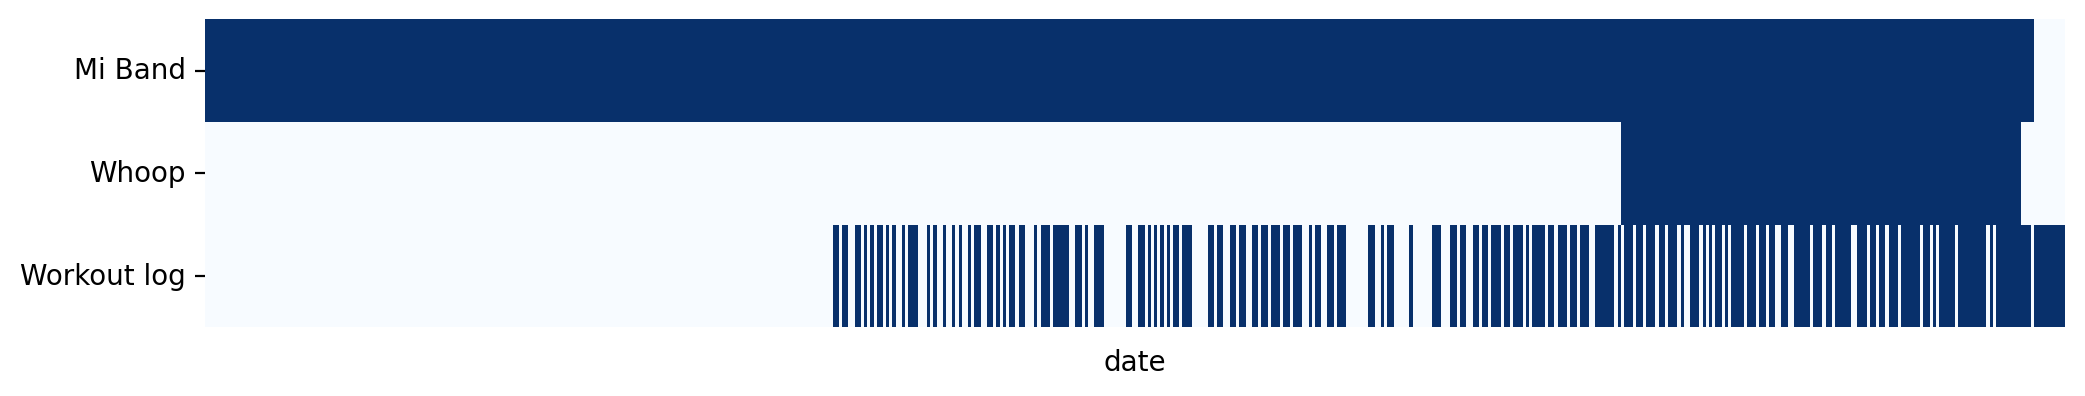

In [136]:
plt.figure(figsize=(12,2))

sns.heatmap(dates.set_index('date').T, cmap='Blues', annot=False, cbar=False,
           xticklabels=False)

➡ To gain the most insight from the data we'll do the following:
- analyze sources sperately
- analyze sources in a pairwise fashion where it makes sense

For each pairwise analysis we'll take only the intersection of date ranges from the source combination.

## MI BAND DATA ANALYSIS

**How was the data collected**

The data comes from Xiaomi Mi Band device which I used everyday.
The data is 100% automatically collected.

**Valuable assets**

The daily step count information.

**Areas for exploration**

Step count evolution through the time I wore the band and across smaller time periods like weekdays and seasons.

### How many steps did I do for the entire period of wearing Mi Band per month?

Despite being sustainably active my daily routine changed many throughout the time I wore the band due to a bunch of life events and changes of habits and preferences.

To see the evolution of my stepcount I will use `mb_steps` dataset.

I will aggreagte data within 2-week periods and plot a line graph across all the date span.

In [137]:
# resampling the original data by 2-week periods

mb_plot_data = mb_steps.set_index('date').resample('2W')['steps'].mean().to_frame()
mb_plot_data.head()

,steps
date,
2021-09-19,5590.666667
2021-10-03,11400.428571
2021-10-17,8925.642857
2021-10-31,8975.428571
2021-11-14,9257.785714


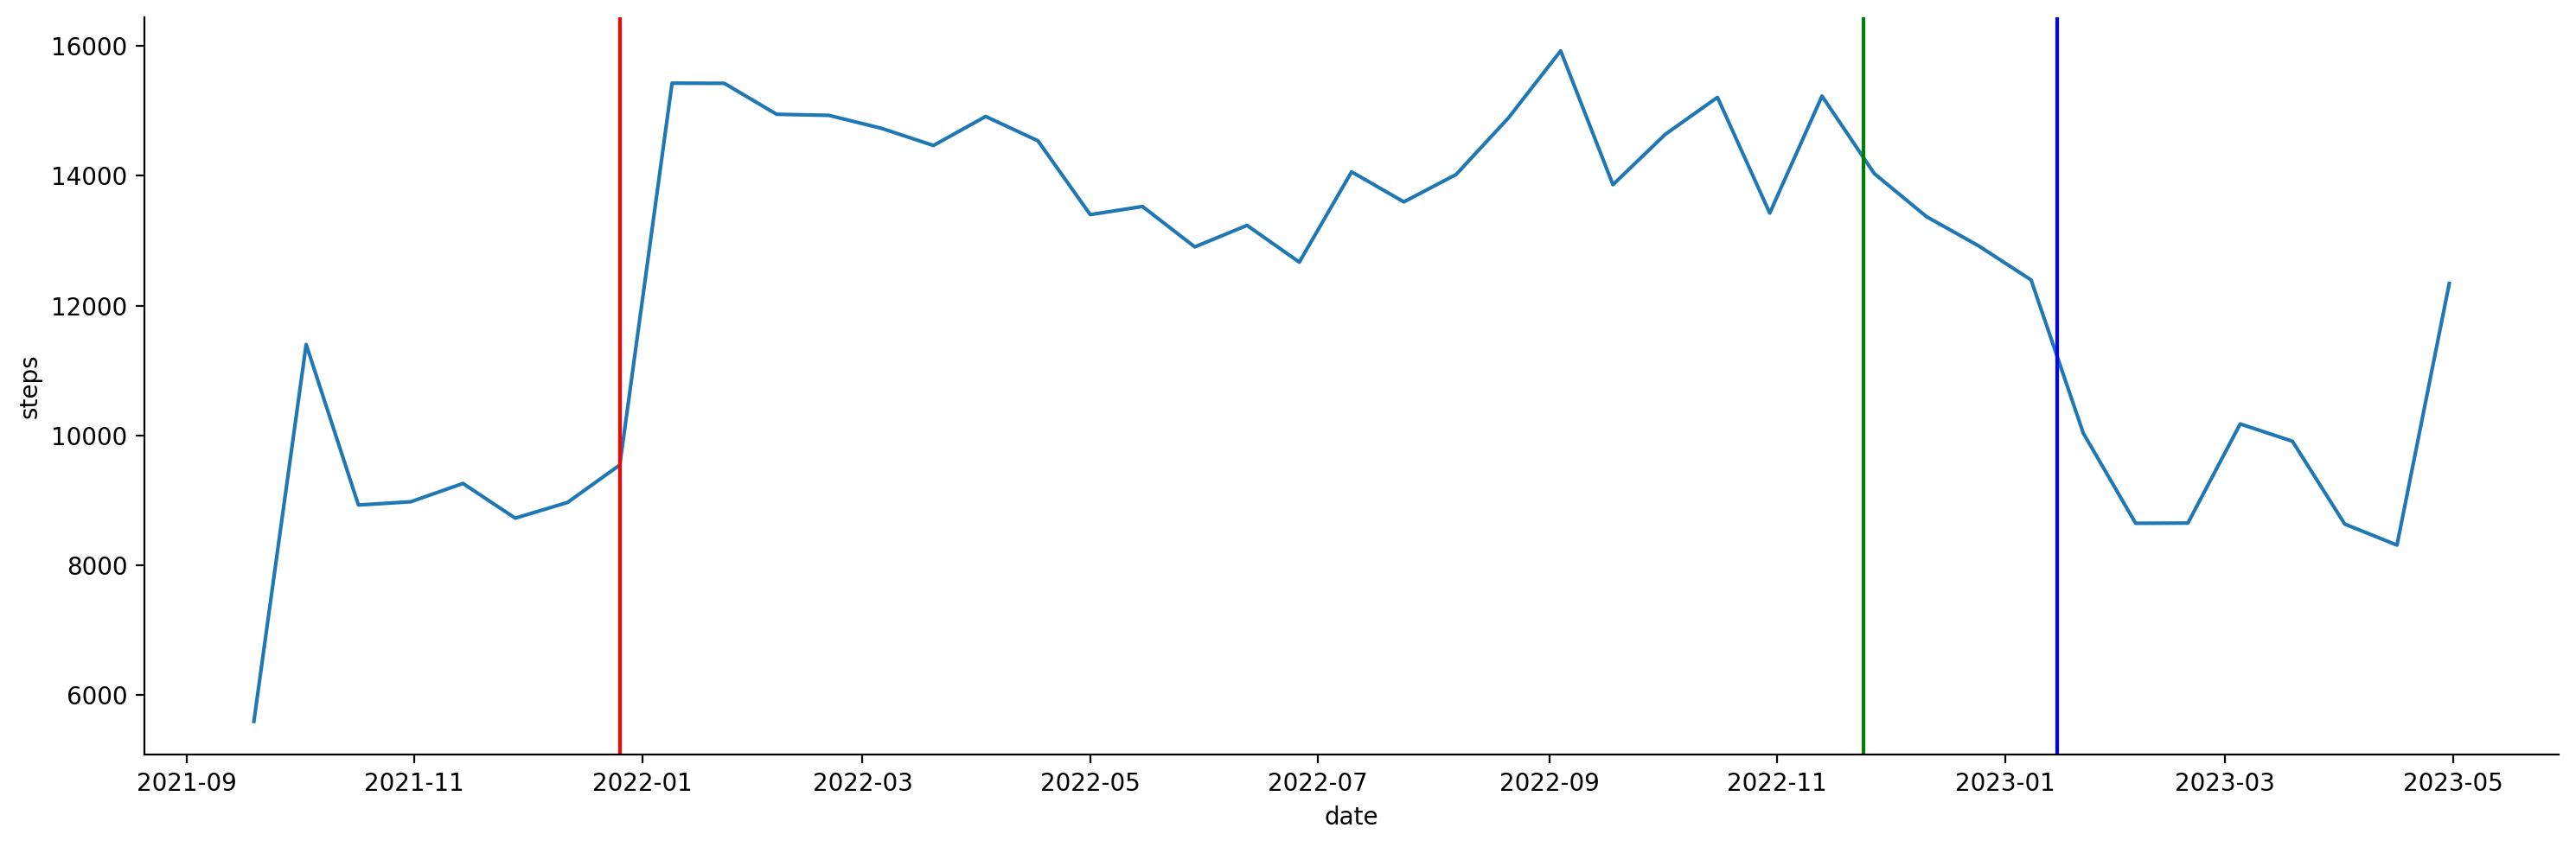

In [138]:
# plotting the data on a line graph

g = sns.relplot(data=mb_plot_data,
           x=mb_plot_data.index,
           y='steps',
           aspect=3, kind='line')

g.ax.axvline(x=pd.to_datetime('2021-12-26', format='%Y-%m-%d'), color='r')
g.ax.axvline(x=pd.to_datetime('2022-11-24', format='%Y-%m-%d'), color='g')
g.ax.axvline(x=pd.to_datetime('2023-01-15', format='%Y-%m-%d'), color='b')

plt.show()

We moved to Valencia in January 2022 and mostly travelled by bus, underground and walking (red line on the graph).

In November 2022 I started using Valenbisi bicycle rental service several times a day (green line).

In January 2023 we bought our own bicycles (blue line).

➡ Looks like the step count is more or less stable from January 2022 and to November 2022 and after that is following a downward trend. 

I would connect the latter fact with the introduction of bicycle into my daily routine.

### On which days of the week do I do more steps on average?

I try to maintain a routine that is quite stable: 
- weekdays are for education and work and weekends are for family and children
- Monday, Tuesday, Thursday and Friday are my gym days + I often run on Sunday mornings

With all my efforts life happens from time to time.

I will use the same `mb_steps` dataset and first aggregate step counts for weekdays and then contrast working days with weekends.

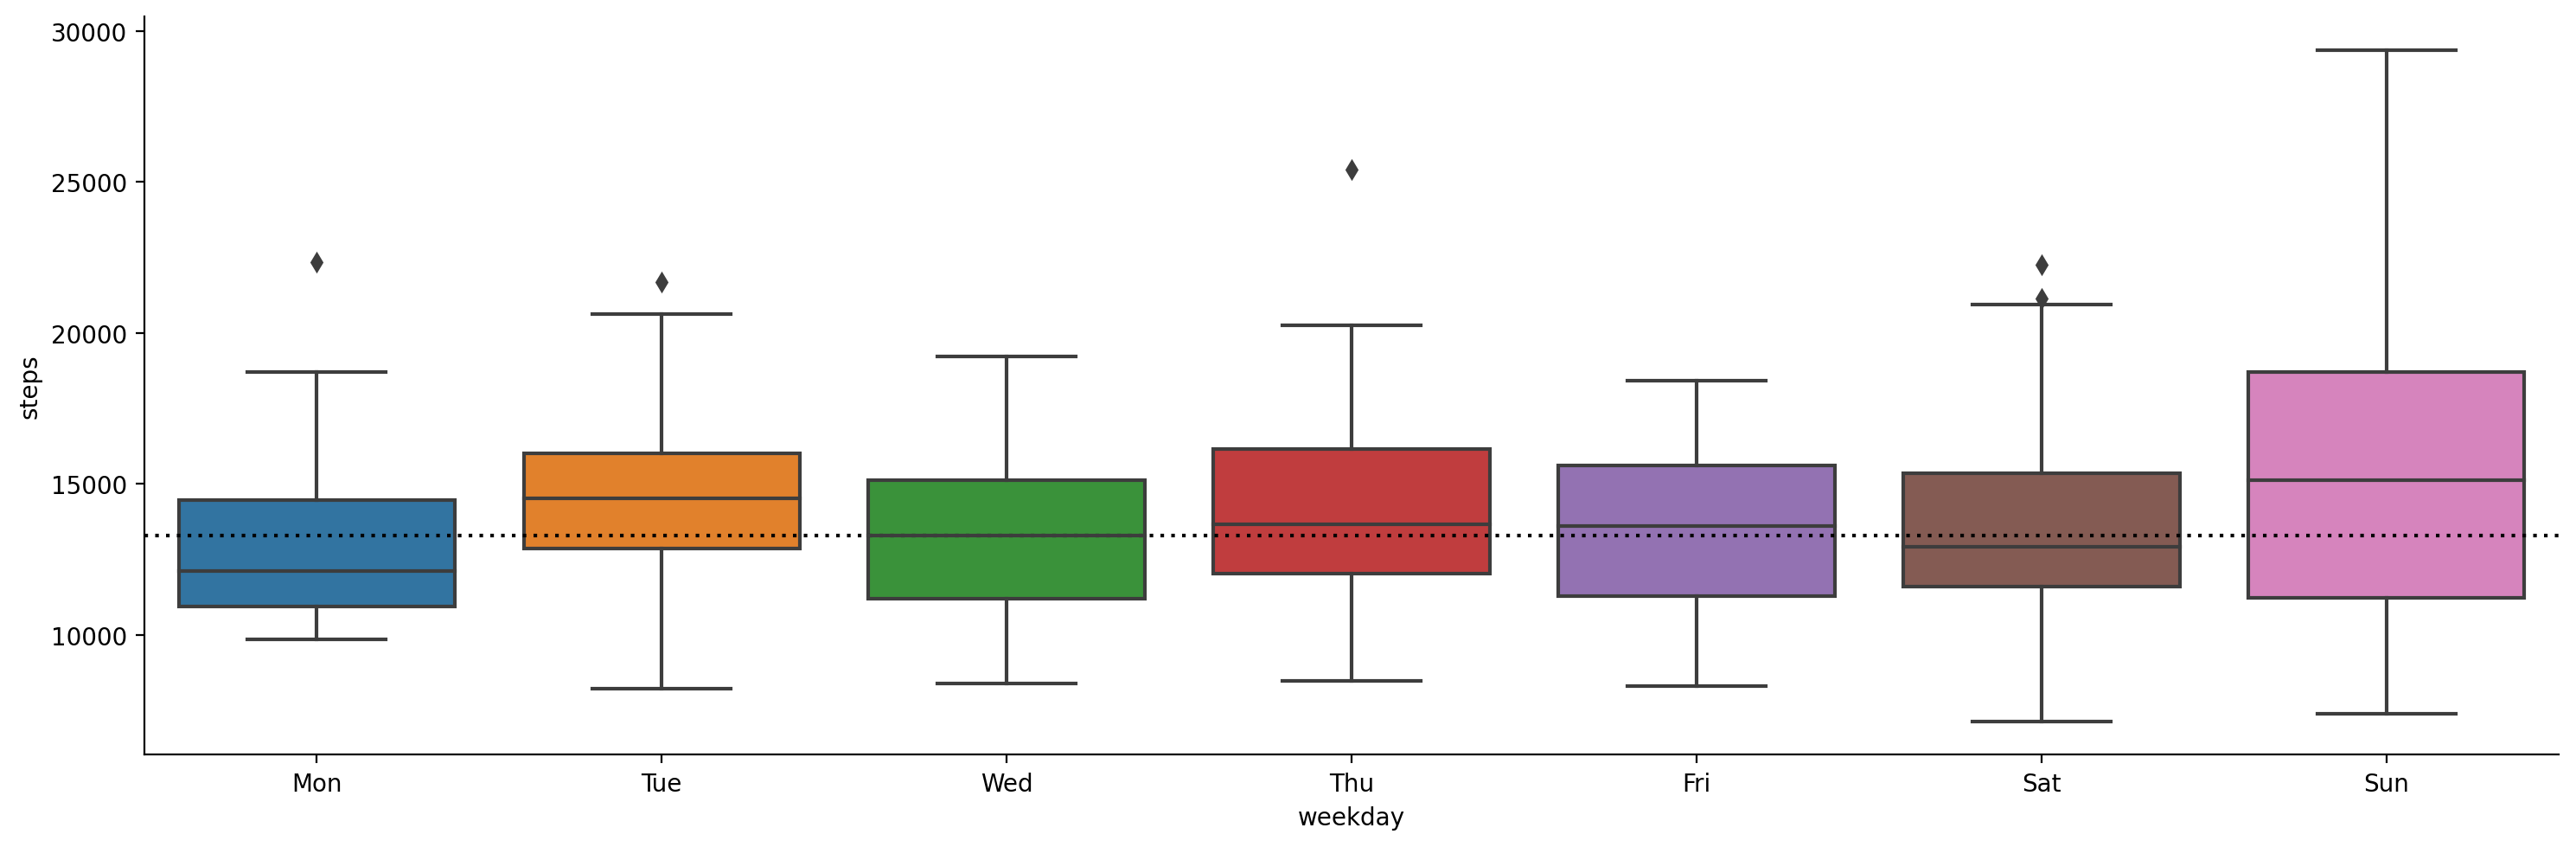

In [139]:
# subsetting the data to exactly one year: from March 1st 2022 and to February 28th 2023

mb_plot_data = mb_steps.loc[(mb_steps['date'] >= pd.to_datetime('01-03-2022', format='%d-%m-%Y')) & 
                                 (mb_steps['date'] <= pd.to_datetime('28-02-2023', format='%d-%m-%Y')), :].copy()


mb_plot_data['month'] = mb_plot_data['date'].dt.month_name()
mb_plot_data['weekday'] = mb_plot_data['date'].dt.weekday
mb_plot_data

g = sns.catplot(data=mb_plot_data.loc[(mb_plot_data['date'] > '2021-12-26') & (mb_plot_data['date'] < '2023-01-15'), :],
           x='weekday',
           y='steps',
           aspect=3,
           kind='box')

overall_mean = mb_plot_data['steps'].mean()

g.ax.axhline(y=overall_mean, dashes=[1,2])

g.set_xticklabels("Mon Tue Wed Thu Fri Sat Sun".split())

plt.show()

➡ How the whole year I seem to be more or less active on all weekdays:
- **Tuesdays, Thursdays, Fridays and Sundays seem to be a bit more active** - three of those days were my typical endurance workout days
- **Mondays and Saturdays were on average below the mean line** - those are days when I probably needed some time to switch from the working day routine into weekday one and vice versa
- and finally **Wednesdays were my gold standard of sustainable movement**

In [140]:
# resetting the data
mb_plot_data = mb_steps.loc[(mb_steps['date'] >= pd.to_datetime('01-03-2022', format='%d-%m-%Y')) & 
                                 (mb_steps['date'] < pd.to_datetime('28-02-2023', format='%d-%m-%Y')), :].copy()

month_to_season = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer',
                   7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'}

# mapping dates to their respective seasons
mb_plot_data['season'] = mb_plot_data['date'].dt.month.map(month_to_season)
mb_plot_data['season'] = pd.Categorical(mb_plot_data['season'], ['Spring', 'Summer', 'Autumn', 'Winter'], ordered=True)

# marking days as weekend days (True) or working days (False)
mb_plot_data['is_weekend'] = mb_plot_data['date'].dt.weekday.isin([5,6])
mb_plot_data.head()

,date,steps,season,is_weekend
165,2022-03-01,16707,Spring,False
166,2022-03-02,13062,Spring,False
167,2022-03-03,9663,Spring,False
168,2022-03-04,15370,Spring,False
169,2022-03-05,10781,Spring,True


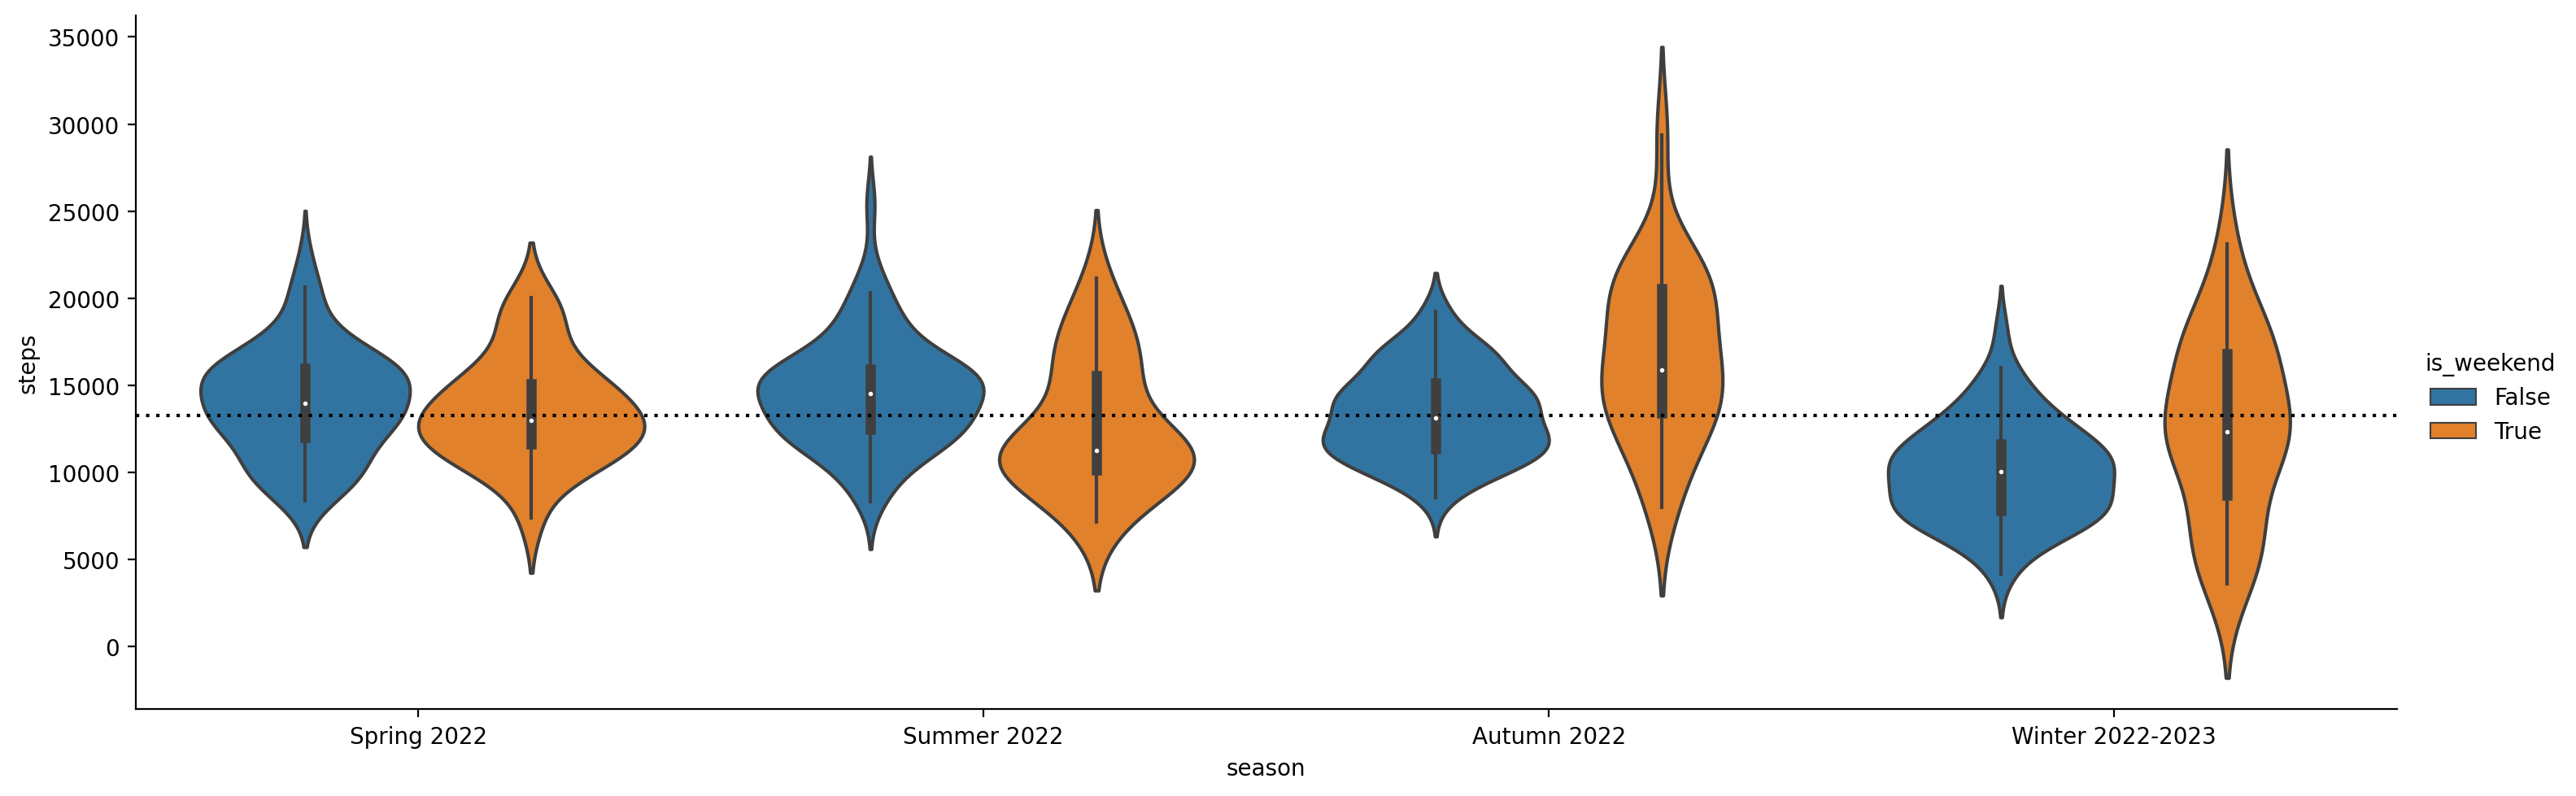

In [141]:
#plotting the step count distribution grouped by season and contrasted by weekend status

g = sns.catplot(data=mb_plot_data,
           x='season',
           y='steps',
        hue='is_weekend',
           aspect=3,
           kind='violin')

g.set_xticklabels("Spring 2022/Summer 2022/Autumn 2022/Winter 2022-2023".split('/'))

g.ax.axhline(y=overall_mean, dashes=[1,2])


plt.show()

We mostly spend days during the week by ourselves and weekends with our kids.

➡ Comparing with overall mean value, **spring and autumn were the most active for us in terms of steps**. I would link it to the weather conditions. In contrast, **in summer we were searhing for shadow at the beach and in winter we discovered bicycle routes**.

➡ Comparing days during the week and weekends, **I would say that we have switched to more active weekends and that's nice**.

## ANALYSING WHOOP DATA

**How was the data collected**

The data comes from Whoop band device which I used everyday since mid-December 2022.
The data is 100% automatically collected.

**Valuable assets**
    
The strong point of this data source is the daily information on sleep, heart rate variability and resting heart rate measurements.

**Areas for exploration**

   I would like to explore relationships between accumulated fatigue, quality of recovery, heart rate variability and resting heart rate.

### How well did I manage to recover from high daily strain?

I tend to think that I auto-regulate my recovery quite well choosing to go to bed earlier, removing excessive external stimuli etc. To be more objective, I will use band's custom-made metrics of accumulated fatigue and recovery.

Whoop has several integral scores like recovery score and daily accumulated strain. I'll take `recovery_score` data from `wh_recoveries` and `scaled_strain` data from `wh_cycles`.

General procedure:
1. Extract daily strain data
2. Extract recovery scores for the subsequent days
3. Join strain data with recovery scores and put both metrics into low/medium/high bins
4. Count low, medium and high recovery scores after high strain days and see the resulting percentage

In [142]:
# extract strain data

wh_plot_data = wh_cycles.loc[:, ['date', 'scaled_strain']].set_index('date')
wh_plot_data.head()

,scaled_strain
date,
2023-04-14,8.634521
2023-04-13,14.277711
2023-04-12,11.816083
2023-04-11,14.066041
2023-04-10,7.624690


In [143]:
# dropping missing values and moving the index one day ahead to perform a correct join later

wh_plot_data = wh_plot_data.dropna()

one_day = pd.Timedelta(1, 'd')
wh_plot_data.index = wh_plot_data.index + one_day

In [144]:
# join strain data with recovery score data
wh_plot_data = wh_plot_data.join(wh_recoveries.set_index('date').loc[wh_plot_data.index, ['recovery_score']]).dropna()

wh_plot_data.head()

,scaled_strain,recovery_score
date,,
2023-04-15,8.634521,55
2023-04-14,14.277711,21
2023-04-13,11.816083,57
2023-04-12,14.066041,47
2023-04-11,7.624690,61


In [145]:
# mapping strain and recovery data into low/medium/high categories

wh_plot_data['scaled_strain'] = pd.cut(wh_plot_data['scaled_strain'], bins=3, labels=['low', 'medium', 'high'])
wh_plot_data['recovery_score'] = pd.cut(wh_plot_data['recovery_score'], bins=3, labels=['low', 'medium', 'high'])
wh_plot_data.head()

,scaled_strain,recovery_score
date,,
2023-04-15,low,medium
2023-04-14,high,low
2023-04-13,medium,medium
2023-04-12,high,medium
2023-04-11,low,medium


high      0.50
medium    0.44
low       0.06
Name: recovery_score, dtype: float64

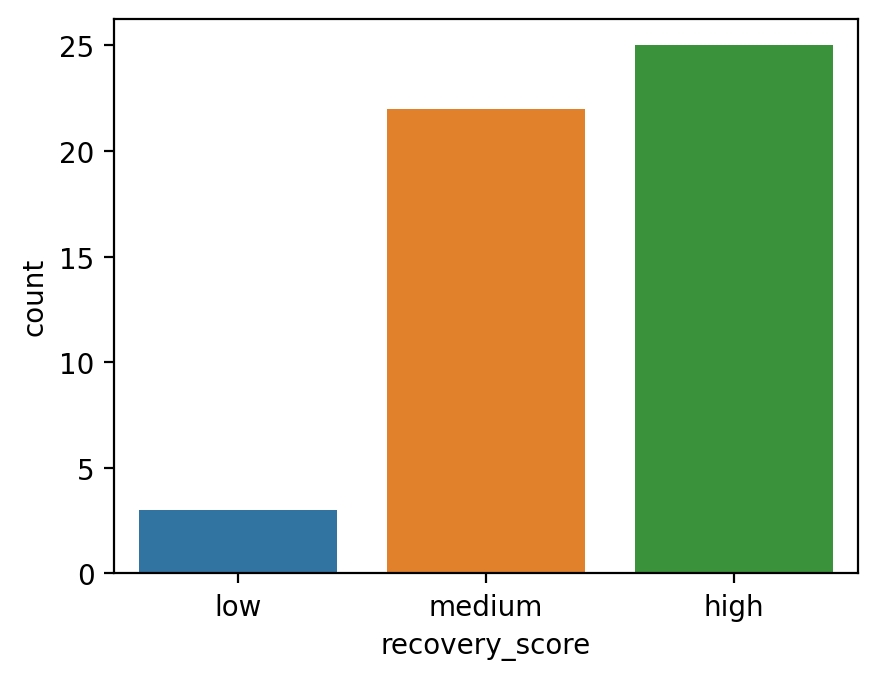

In [146]:
sns.countplot(x=wh_plot_data.loc[wh_plot_data['scaled_strain'] == 'high', 'recovery_score'])

wh_plot_data.loc[wh_plot_data['scaled_strain'] == 'high', 'recovery_score'].value_counts(normalize=True)

➡ Yes, **I managed to get medium or high recovery scores 94% of time**

### Are my heart rate variability (HRV) and resting heart rate correlated? If so, to what extent?

There is some evidence to suggest that there may be a relationship between HRV and resting heart rate. Specifically, some studies have found that individuals with higher resting heart rates tend to have lower HRV, while those with lower resting heart rates tend to have higher HRV.

I will use `hrv_rmssd` and `resting_heart_rate` fields from `wh_recoveries` dataset.

General procedure:
1. Calculate correlation coefficient.
2. Plot the measurements on a scatter plot.

In [147]:
wh_plot_data = wh_recoveries.loc[:, ['date', 'hrv_rmssd', 'resting_heart_rate']].set_index('date')
wh_plot_data

,hrv_rmssd,resting_heart_rate
date,,
2023-04-15,0.105142,44
2023-04-14,0.087425,46
2023-04-13,0.108626,44
2023-04-12,0.105237,45
2023-04-11,0.109160,43
...,...,...
2022-12-14,0.141512,39
2022-12-13,0.154109,39
2022-12-12,0.136100,39


In [148]:
wh_plot_data.corr()

,hrv_rmssd,resting_heart_rate
hrv_rmssd,1.000000,-0.511163
resting_heart_rate,-0.511163,1.000000


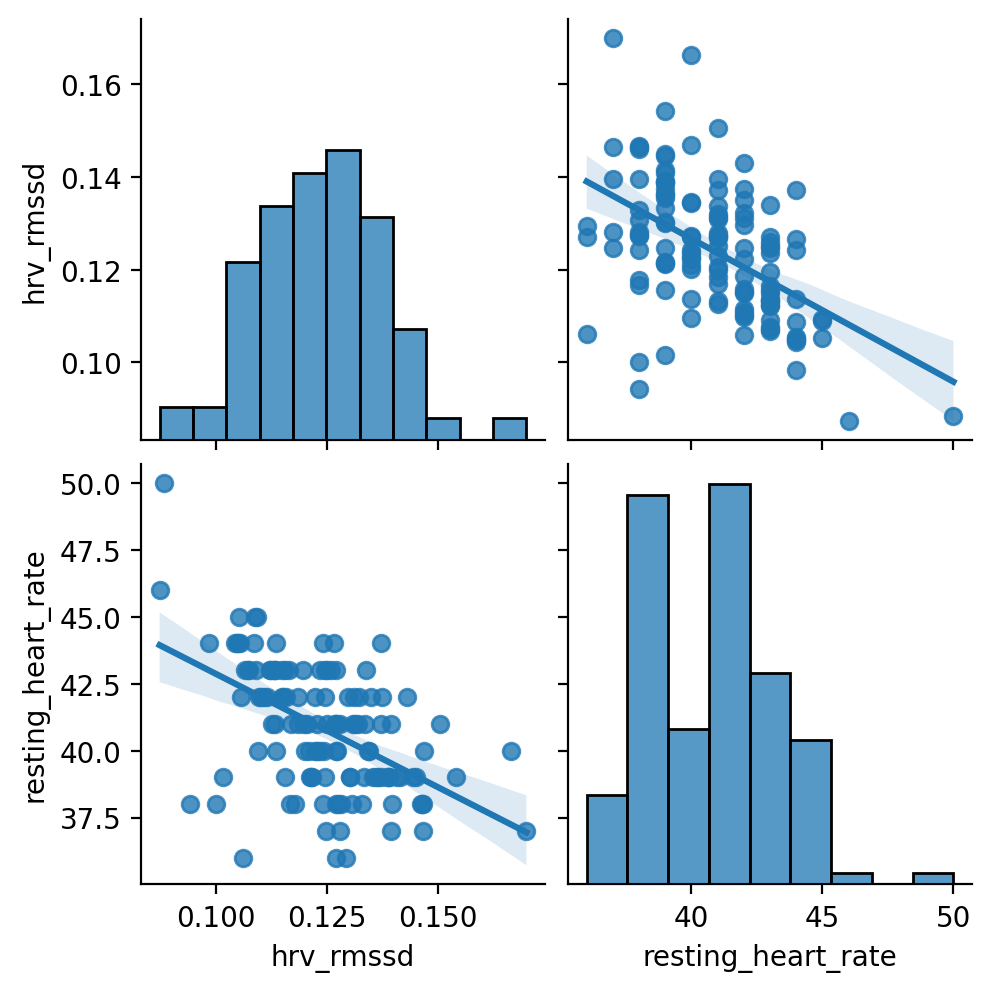

In [149]:
sns.pairplot(data=wh_plot_data,
             kind='reg',
             )

➡ We see that while **my HRV and resting heart rates are somewhat correlated, the strength of correlation is medium**.

## ANALYSING WORKOUT LOG


**How was the data collected**

The data comes from regular manual typing of workouts into a text file. In the log I tried to follow a simple text structure: date of the workout in a `dd-mm-yyyy wd` format + workout description.

**Valuable assets**

The strong point of this data source is the detailed workout description and the fact that I never skipped logging my workouts.

**Areas for exploration**

I would like to see how my training routine changes over time in terms of training days and exercise preferences.

## Which weekdays I trained the most?

My training schedule is an almost non-negotiable thing. But when it turns out impossible to stick to the schedule my mindset helps me be flexible. I would like to look backwads and see which days were less affected by holidays and other life events.

I will use training dates from `workout_log` and all the dates from the first to the last workout logged.

General procedure:
1. Count training session per weekday.
2. Count total weekdays for the period from the first to the last workout logged.
3. Calculate a proportion of training days to total days by weekday.

In [150]:

wl_plot_data = workout_log

wl_plot_data['weekday'] = wl_plot_data['date'].dt.weekday
wl_plot_data['month'] = wl_plot_data['date'].dt.month

s1 = wl_plot_data.set_index('date').groupby('weekday')['content'].count()

In [151]:

date_range = pd.date_range(wl_plot_data['date'].min(), wl_plot_data['date'].max()).to_series()
s2 = date_range.groupby(date_range.dt.weekday).count()

In [152]:
df = pd.concat([s1,s2], axis=1)
df.columns = ['Trained','Total']

df['%'] = df['Trained'] / df['Total']
df.index = 'Mon Tue Wed Thu Fri Sat Sum'.split()
df

,Trained,Total,%
Mon,46,57,0.807018
Tue,51,57,0.894737
Wed,12,56,0.214286
Thu,46,56,0.821429
Fri,38,56,0.678571
Sat,20,56,0.357143
Sum,30,56,0.535714


<AxesSubplot:xlabel='%'>

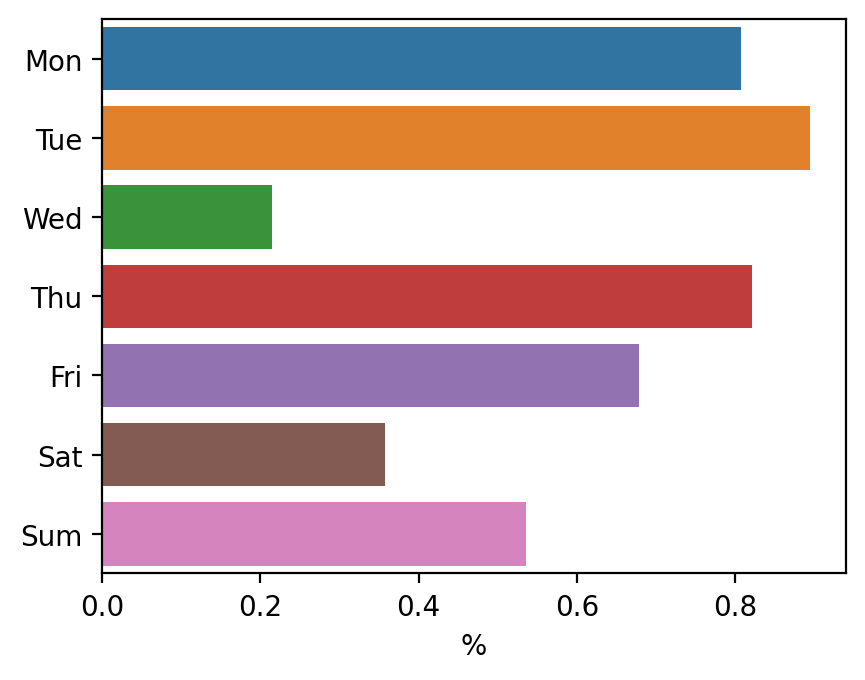

In [153]:
sns.barplot(data=df,
           y=df.index,
           x='%',
           )

➡ **Tuesdays (89.5%), Thursdays (82.1%) and Mondays (80.7%) were my three most regular training days**.

### Did I manage to restrict my routine to 2-3 days of endurance instead of 4-5 days?

As I have a strong endurance background and this has always been my favourite part of training. But at some moment I decided to do less endurance work and more strength work, which is what I really need to be a well-balanced athlete.

I will use the entire `workout_log` dataset and textually analyze workout contents.

I will create a list of keywords describing endurance workouts, mark endurance workouts and see their concentration across weekdays.

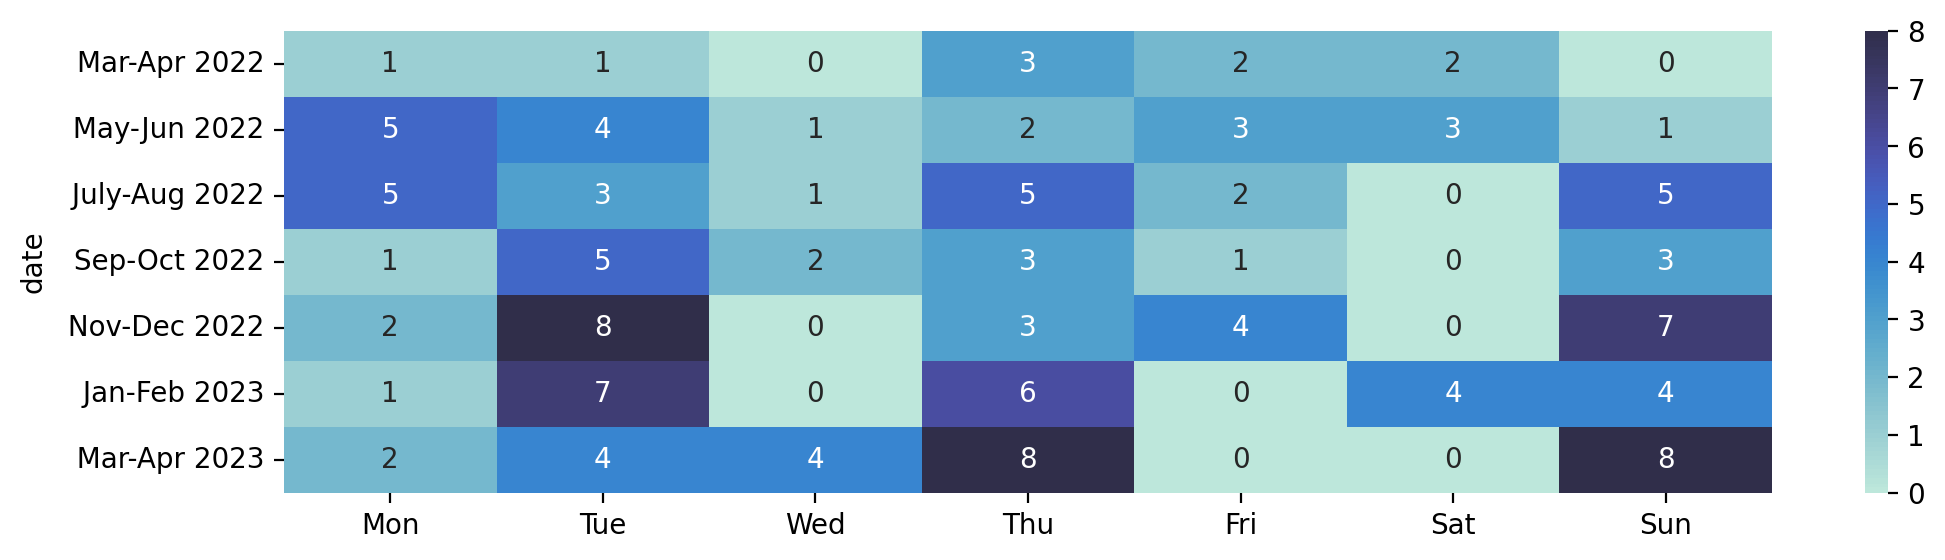

In [154]:
# creating a list of keywords for endurance exercises
endurance = ['лыж','греб','бег','байк','саней', 'ассаулт', 
            'мах', 'бёрпи', 'броск', 'запрыгив', 
            'калори']

wl_plot_data = workout_log

# adding weekday feature and marking days as endurance (True) or not (False)
wl_plot_data['weekday'] = wl_plot_data['date'].dt.weekday
wl_plot_data['endurance'] = wl_plot_data['content'].str.lower().str.contains('|'.join(endurance))

# filtering for endurance days only
wl_plot_data = wl_plot_data[wl_plot_data['endurance'] == True]

# breaking the date range into 2-month periods and counting for each weekday it's respective number of endurance days
wl_plot_data = wl_plot_data.set_index('date').resample('2M')['weekday'].value_counts()

# prepring data for plotting
wl_plot_data = wl_plot_data.unstack().fillna(0)
wl_plot_data.columns = 'Mon Tue Wed Thu Fri Sat Sun'.split()

plt.figure(figsize=(12,3))
sns.heatmap(wl_plot_data.iloc[:-1],
           annot=True,
           center=10,
           ).set_yticklabels('Mar-Apr 2022, May-Jun 2022, July-Aug 2022, Sep-Oct 2022, Nov-Dec 2022, Jan-Feb 2023,  Mar-Apr 2023'.split(','))

plt.show()

➡ Looks like **I mostly succeded to constrain myself into 2-3 days of endurance work which are Tuesday, Thursday and Sunday**.

The seemingly broken trend in March-April 2023 is mostly likely associated with regional holidays: we had 11 non-working days above the normal challenging the training routine.

###  What were the 5 most common words I used to log workouts?

For a long time my training was mostly intuitive: I wanted to "go hard" every time, but selected exercises, weights and tempos by feeling.

I will use workout descriptions from `workout_log` dataset.

I will make a word count for every workout description, filter it for only relevant words and then group by date periods of various lengths.

In [155]:
from collections import Counter

wl_plot_data = workout_log

# counting the occurences of all words used in the log
wl_plot_data['words'] = wl_plot_data['content'].str.split().apply(Counter)

In [156]:
# defining a function to filter only potentially meaningful words
def filter_words(row, n=10):
    word_filter = ['штанг', 'ганте', 'перек', 'трена', 
                   'раунд', 'отдых', 'минут', 'макси', 'упраж', 'кажды', 
                   'хвато', 'интер', 'равно', 'метро',
                   'мален', 'больш']
    
    output = []
    counter = 0
    
    for word, occurrence in row:
        # filtering for relatively long words that doesn't describe equipment, time of work and rest etc.
        if len(word) > 5 and not (word[:5].lower() in word_filter) and counter < n:
            output.append((word, occurrence))
            counter += 1

    return output

wl_plot_data = wl_plot_data.set_index(['date']).resample('2M')['words'].agg(sum).apply(Counter.most_common).apply(filter_words, args=[5]).to_frame()


wl_plot_data

,words
date,
2022-04-30,"[(предплечья, 7), (сгибание, 5), (ассаулт, 3),..."
2022-06-30,"[(предплечья, 10), (стойку, 9), (сгибание, 9),..."
2022-08-31,"[(отжимания, 9), (сгибание, 9), (предплечья, 9..."
2022-10-31,"[(подтягивания, 11), (отжимания, 9), (предплеч..."
2022-12-31,"[(подтягивания, 13), (предплечья, 12), (планка..."
2023-02-28,"[(предплечья, 14), (сгибание, 11), (подтягиван..."
2023-04-30,"[(подтягивания, 13), (планка, 12), (динамическ..."
2023-06-30,"[(присед, 1), (подтягивания, 1), (сверху, 1), ..."


The winner is clear but we are still one step away from the final result table...

In [157]:
all_words_counter = Counter()

for row in wl_plot_data['words'].apply(dict):
    all_words_counter.update(row)
    
all_words_counter.most_common(5)

[('подтягивания', 63),
 ('предплечья', 60),
 ('отжимания', 48),
 ('сгибание', 41),
 ('планка', 38)]

➡ **My favourite exercises during the last year were pull-ups (подтягивания) followed by bicep curls (сгибание, предплечья) and push-ups and dips (отжимания).**

We can see that as time went by my exercise selection was biased towards one or other exercise, but they continued to be a staple in the program.

## ANALYSING MI BAND AND WHOOP DATA

This is the intersection of data from two bands: Xiaomi Mi Band and Whoop band.

Both bands track sleep and continuously measure heartrate.

I would like to explore how correlated were those sleep and heartrate measurements.

### Comparing sleep data from two bands

The reason for purchasing Whoop band was that I started having doubts about the precision with which Mi Band measures and analyses sleep. The numbers more often than not didn't correspond with my sleep quality perception. After wearing Whoop band for several months I felt that it better fits my subjective feeling.

I will use `mb_sleep` and `wh_sleep` datasets.

General procedure:
1. Restrict both on the intersection of their date ranges which is Whoop date range.
2. Extract 4 measurements from each dataset: SWS, REM, light sleep phase duration and total sleep time.
3. Find correlation coefficients and plot a graph.

In [158]:
# setting the date range to use to Whoop dates only
actual_dates = dates.set_index('date')['Whoop']

In [159]:
# preparing Whoop sleep data: restricting to actual dates, converting units and calculating total sleep time

wh_plot_data = wh_sleep.set_index('date').loc[actual_dates, ['slow_wave_sleep_duration', 'rem_sleep_duration', 'light_sleep_duration', ]] / 60000

wh_plot_data.columns = ['wh_SWS', 'wh_REM', 'wh_Light']
wh_plot_data['wh_Total'] = wh_plot_data.sum(axis=1)

wh_plot_data = wh_plot_data.sort_index()
wh_plot_data.head()

,wh_SWS,wh_REM,wh_Light,wh_Total
date,,,,
2022-12-10,74.120467,136.673467,193.484067,404.278000
2022-12-11,92.891233,134.282450,190.657700,417.831383
2022-12-12,103.479483,93.355433,186.745217,383.580133
2022-12-13,103.479983,101.073183,217.530933,422.084100
2022-12-14,85.671767,150.646750,191.059967,427.378483


In [160]:
# preparing Mi Band sleep data: restricting to actual dates and calculating total sleep time

mb_plot_data = mb_sleep.set_index('date').loc[actual_dates, ['deepSleepTime', 'REMTime', 'shallowSleepTime']]#, 'wakeTime']]

mb_plot_data.columns = ['mb_SWS', 'mb_REM', 'mb_Light']
mb_plot_data['mb_Total'] = mb_plot_data.sum(axis=1)
mb_plot_data = mb_plot_data.astype(float).sort_index()
mb_plot_data.head()

,mb_SWS,mb_REM,mb_Light,mb_Total
date,,,,
2022-12-10,0.0,65.0,357.0,422.0
2022-12-11,0.0,76.0,374.0,450.0
2022-12-12,0.0,113.0,334.0,447.0
2022-12-13,0.0,91.0,339.0,430.0
2022-12-14,73.0,87.0,295.0,455.0


In [161]:
# joining the two dataframes together

mbwh_plot_data = mb_plot_data.join(wh_plot_data)
mbwh_plot_data.head()

,mb_SWS,mb_REM,mb_Light,mb_Total,wh_SWS,wh_REM,wh_Light,wh_Total
date,,,,,,,,
2022-12-10,0.0,65.0,357.0,422.0,74.120467,136.673467,193.484067,404.278000
2022-12-11,0.0,76.0,374.0,450.0,92.891233,134.282450,190.657700,417.831383
2022-12-12,0.0,113.0,334.0,447.0,103.479483,93.355433,186.745217,383.580133
2022-12-13,0.0,91.0,339.0,430.0,103.479983,101.073183,217.530933,422.084100
2022-12-14,73.0,87.0,295.0,455.0,85.671767,150.646750,191.059967,427.378483


In [162]:
# calculating correlation coefficients

mbwh_plot_data.corr()

,mb_SWS,mb_REM,mb_Light,mb_Total,wh_SWS,wh_REM,wh_Light,wh_Total
mb_SWS,1.000000,0.061823,-0.591653,0.166426,0.000322,-0.180785,0.074582,-0.043459
mb_REM,0.061823,1.000000,-0.024340,0.458065,0.203296,-0.067009,0.153833,0.167081
mb_Light,-0.591653,-0.024340,1.000000,0.614857,0.159777,0.211335,0.004902,0.188461
mb_Total,0.166426,0.458065,0.614857,1.000000,0.262957,0.059257,0.130896,0.244087
wh_SWS,0.000322,0.203296,0.159777,0.262957,1.000000,0.254598,0.146727,0.625759
wh_REM,-0.180785,-0.067009,0.211335,0.059257,0.254598,1.000000,-0.462775,0.280291
wh_Light,0.074582,0.153833,0.004902,0.130896,0.146727,-0.462775,1.000000,0.676323
wh_Total,-0.043459,0.167081,0.188461,0.244087,0.625759,0.280291,0.676323,1.000000


In [163]:
# finding minimal and maximal correlation coefficients

mbwh_corr = mbwh_plot_data.corr().stack()

mbwh_corr = mbwh_corr[mbwh_corr != 1].sort_values(ascending=False)

mbwh_corr.head(6).iloc[::2]

wh_Total  wh_Light    0.676323
wh_SWS    wh_Total    0.625759
mb_Light  mb_Total    0.614857
dtype: float64

In [164]:
mbwh_corr.tail(6).iloc[::-2]

mb_Light  mb_SWS     -0.591653
wh_REM    wh_Light   -0.462775
          mb_SWS     -0.180785
dtype: float64

➡ **There seem to be no meaningful correlations between sleep phase durations and even the totals of sleep duration `mb_Total` and `wh_Total` have little correlation (0.244087)**.

Let's look at the data and its distributions.

SWS


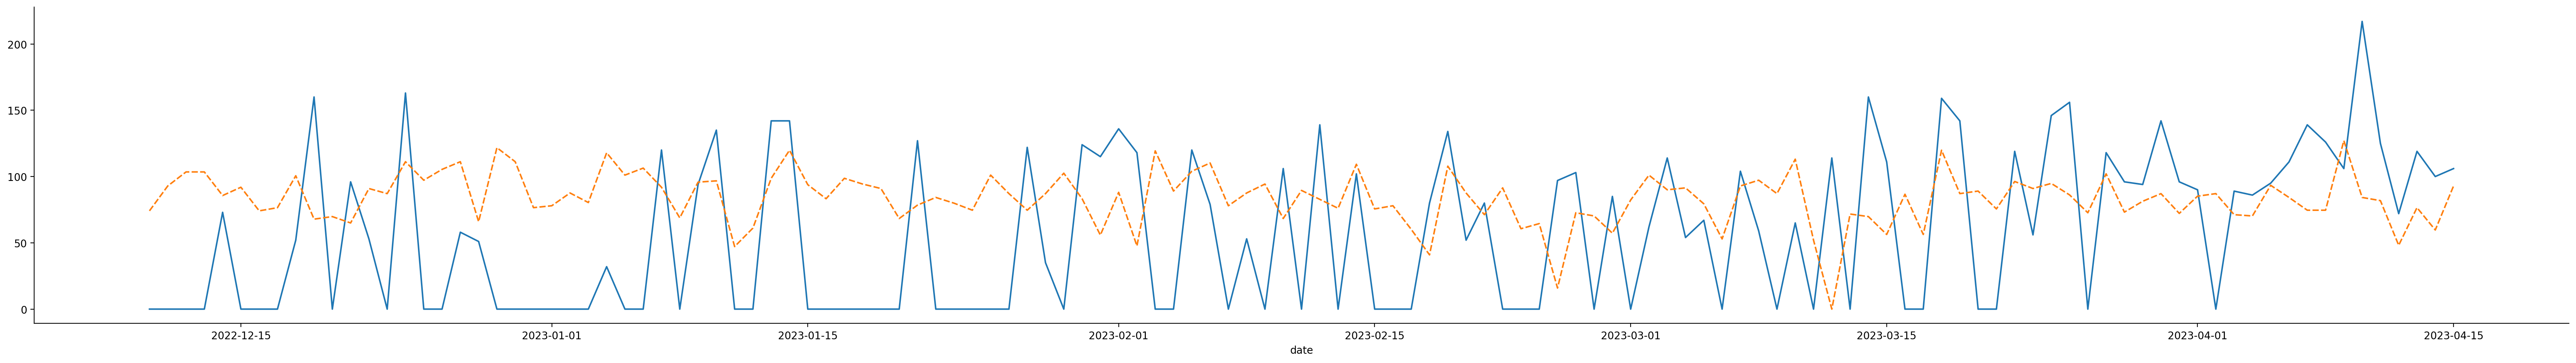

REM


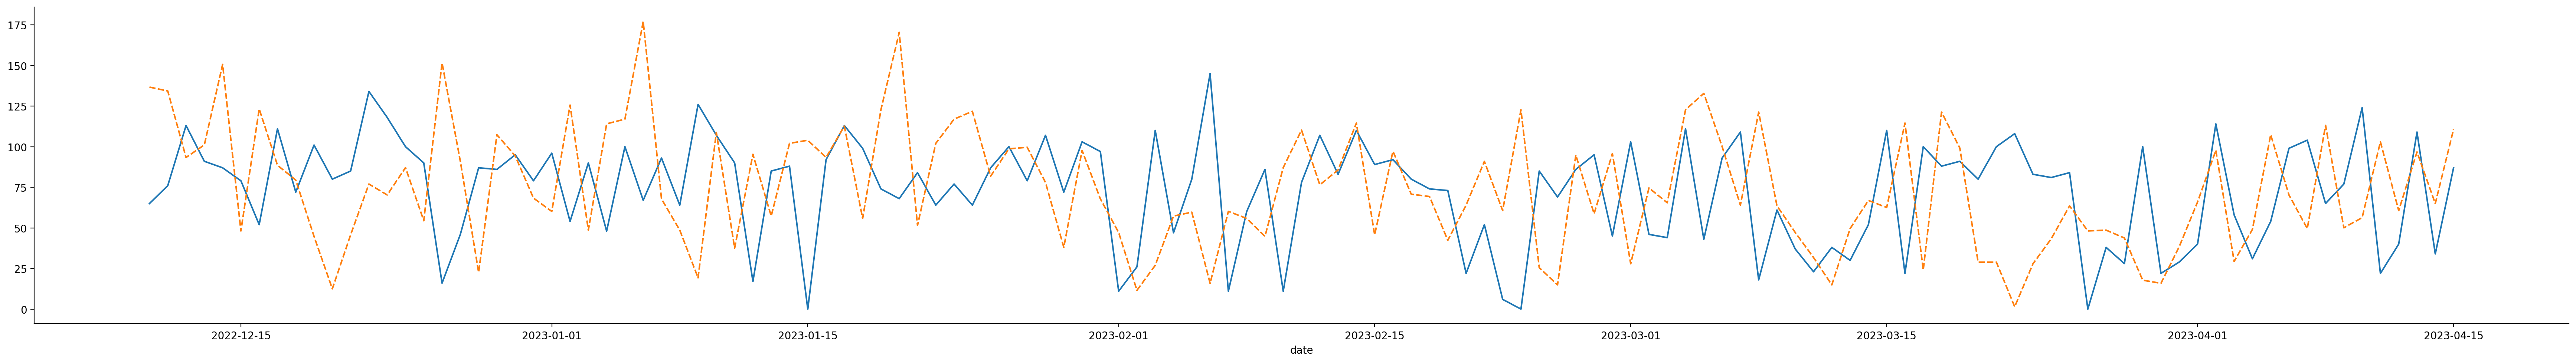

Light


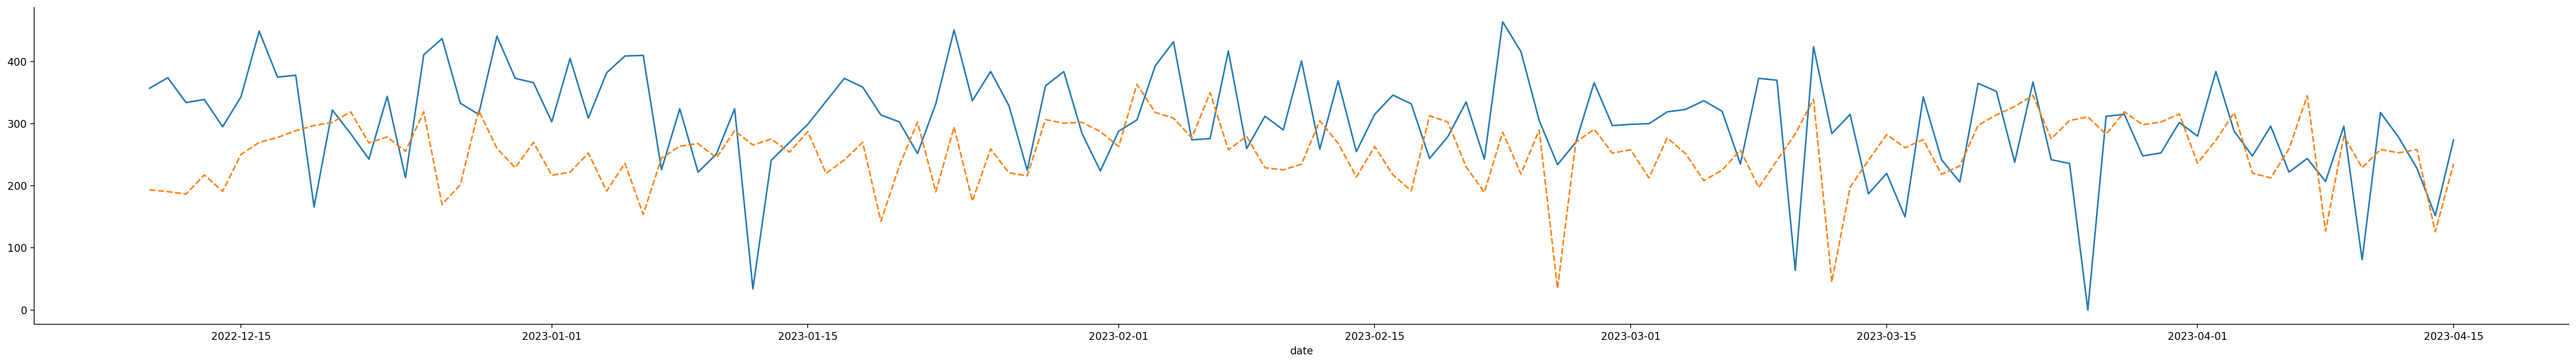

Total


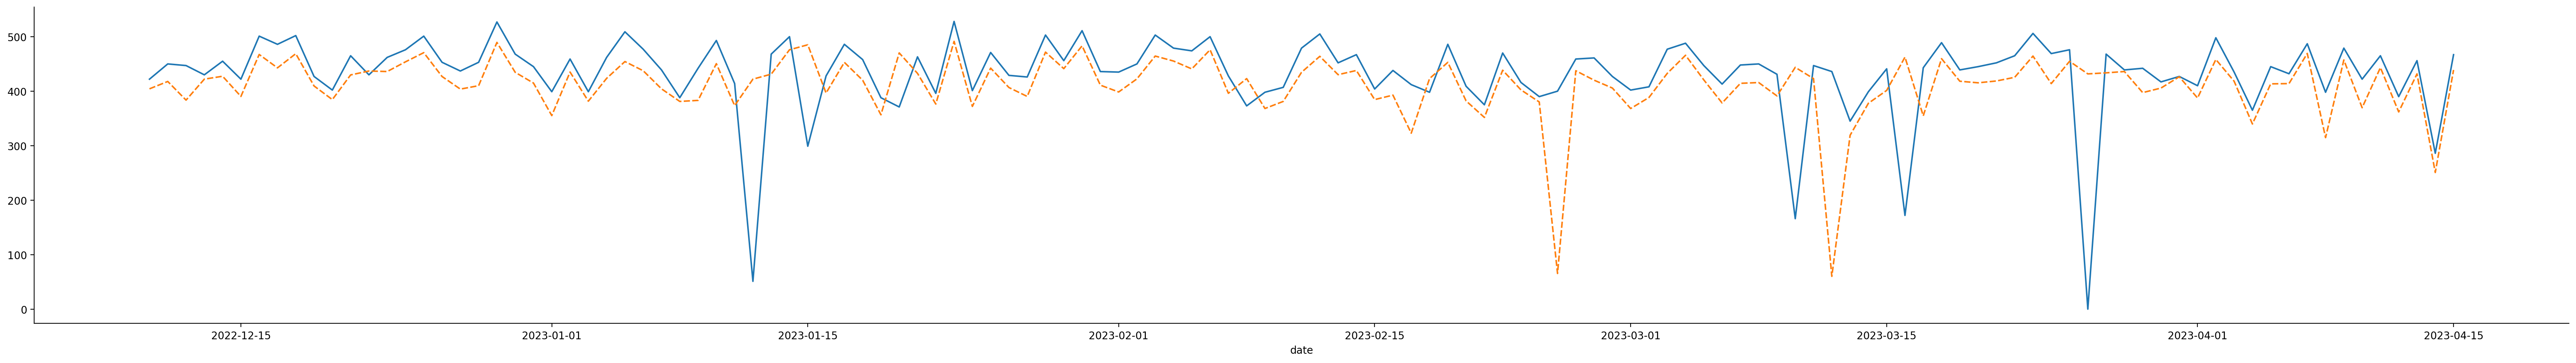

In [165]:
# plotting sleep phase and duration data

graphs = ['SWS', 'REM', 'Light', 'Total']

for one_graph in graphs:
    print(one_graph)
    g = sns.relplot(data=mbwh_plot_data.loc[:, mbwh_plot_data.columns.str.contains(one_graph)],
               kind='line',
           aspect=7, legend=False)
    plt.show()

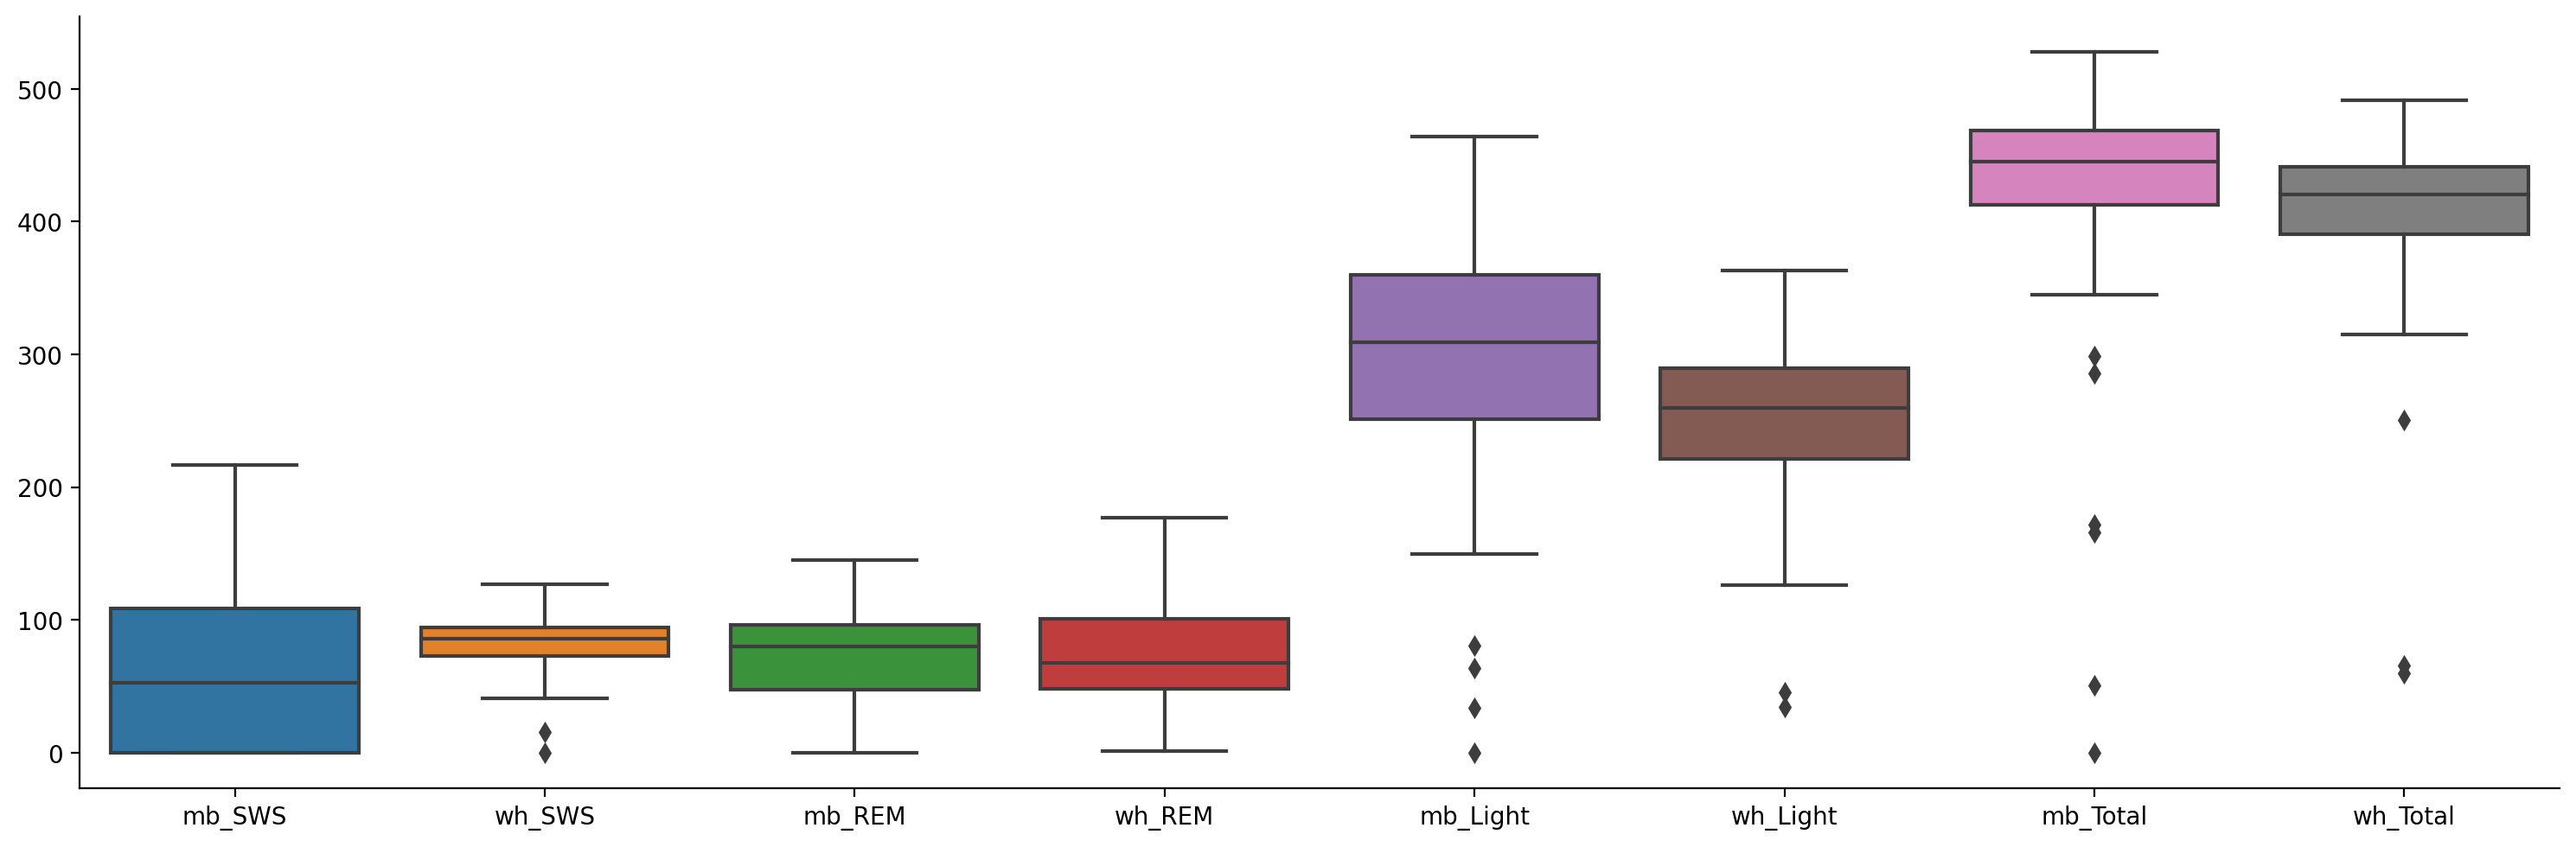

In [166]:
sns.catplot(data=mbwh_plot_data,
           kind='box', order=['mb_SWS', 'wh_SWS', 'mb_REM', 'wh_REM', 'mb_Light', 'wh_Light', 'mb_Total', 'wh_Total'],
           aspect=3)

plt.show()

**In 5 out of 8 columns we see some lower-bound outliers**. Let's delete the dates when either columns has outliers and repeat the correlation-seeking process again.

In [167]:
# defining a function returning outlier indices

def get_outlier_indices(s):
    iqr = s.quantile(0.75) - s.quantile(0.25)
    
    return s.loc[(s < (s.quantile(0.25) - 1.5 * iqr)) | (s > (s.quantile(0.75) + 1.5 * iqr))].index

In [168]:
# finding outliers across all columns

outliers = pd.DatetimeIndex([])

for one_graph in graphs:    
    outliers = outliers.union(get_outlier_indices(mbwh_plot_data['mb_' + one_graph]))
    outliers = outliers.union(get_outlier_indices(mbwh_plot_data['wh_' + one_graph]))

mbwh_plot_data2 = mbwh_plot_data
mbwh_plot_data2 = mbwh_plot_data2.drop(outliers, axis=0)
outliers

DatetimeIndex(['2023-01-12', '2023-01-15', '2023-02-25', '2023-03-10',
               '2023-03-12', '2023-03-16', '2023-03-26', '2023-04-10',
               '2023-04-14'],
              dtype='datetime64[ns]', freq=None)

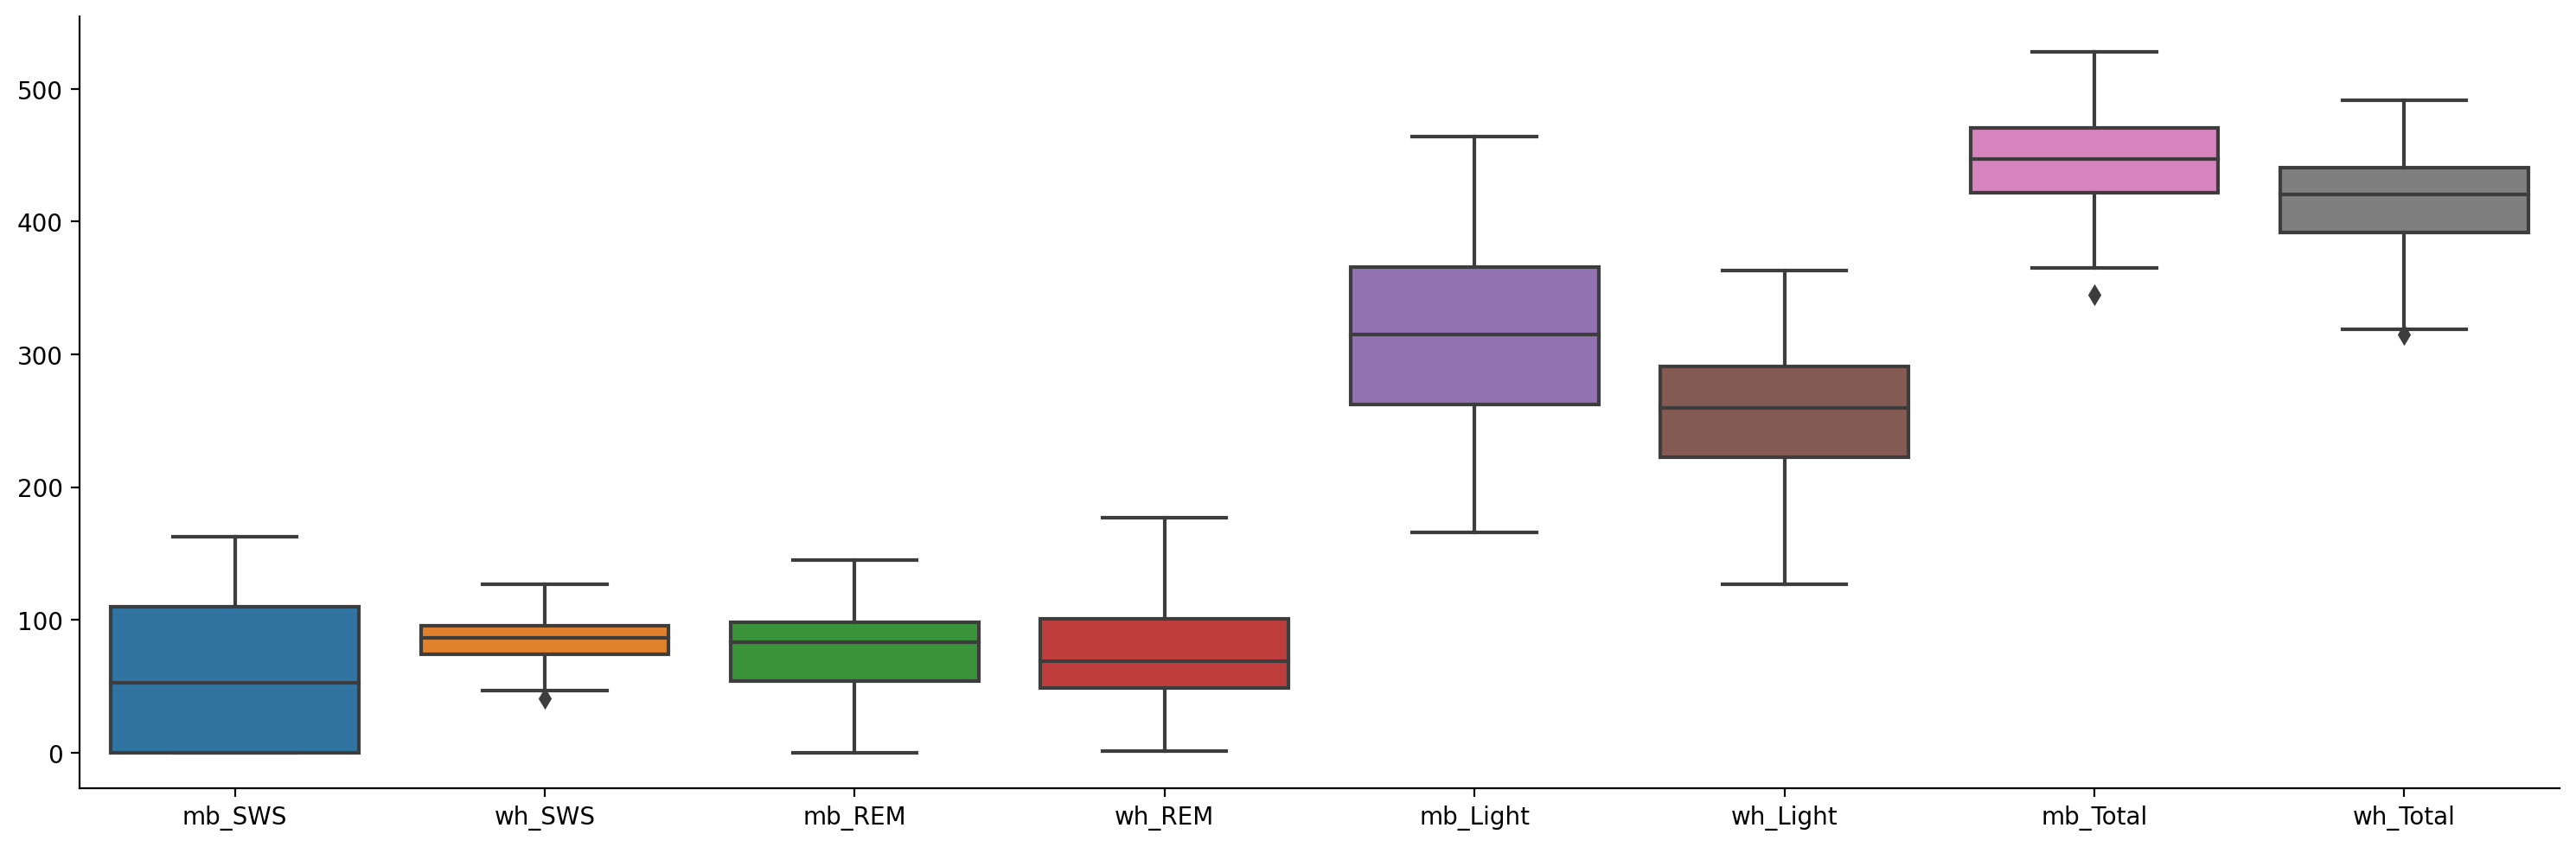

In [169]:
sns.catplot(data=mbwh_plot_data2,
           kind='box', order=['mb_SWS', 'wh_SWS', 'mb_REM', 'wh_REM', 'mb_Light', 'wh_Light', 'mb_Total', 'wh_Total'],
           aspect=3)

plt.show()

In [170]:
# calculate correlation coefficients
mbwh_corr = mbwh_plot_data2.corr().stack()

mbwh_corr = mbwh_corr[mbwh_corr != 1].sort_values(ascending=False)

mbwh_corr.head(6).iloc[::2]

mb_Total  wh_Total    0.845406
wh_SWS    mb_Total    0.499958
wh_Total  wh_Light    0.472825
dtype: float64

In [171]:
mbwh_corr.tail(6).iloc[::-2]

mb_SWS    mb_Light   -0.795527
wh_Light  wh_REM     -0.713690
mb_REM    mb_Light   -0.262225
dtype: float64

➡ Despite having total sleep duration values much more correlated, **we still don't see any meaningful correlation between same sleep phases from two bands. That confirms the difference with which the two bands analyze sleep**.

### Comparing heartrate data from two bands

Both bands measure heart rate in backgruond mode and surely do so with a high sampling frequency to be able to count calorie expenditure and other metrics.

Data to use: `mb_heartrate` and `wh_heartrate` datasets

General procedure:
1. Compare heartrate monthly sampling frequency.
2. Plot a distribution of heartrate measurements from two bands.

In [172]:
# preparing both datasets for comparison

wh_plot_data = wh_heartrate
wh_plot_data['date'] = pd.to_datetime(wh_plot_data['ts'].dt.date)
wh_plot_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835755 entries, 0 to 335773
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   hr      835755 non-null  int64         
 1   ts      835755 non-null  datetime64[ns]
 2   date    835755 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 25.5 MB


In [173]:
mb_plot_data = mb_heartrate
mb_plot_data['ts'] = pd.to_datetime(mb_plot_data['date'].astype(str) + ' ' + mb_plot_data['time'].astype(str).str.slice(-8, None), format='%Y-%m-%d %H:%M:%S')
new_columns = ['hr', 'ts']

mb_plot_data = mb_plot_data.loc[:, new_columns]
mb_plot_data['date'] = pd.to_datetime(mb_plot_data['ts'].dt.date)
mb_plot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694198 entries, 0 to 694197
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   hr      694198 non-null  int64         
 1   ts      694198 non-null  datetime64[ns]
 2   date    694198 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 15.9 MB


In [174]:
# subsetting the data to actual date range

wh_plot_data = wh_plot_data.set_index('date').loc[actual_dates, :]
mb_plot_data = mb_plot_data.set_index('date').loc[actual_dates, :]

#### How many times did Mi Band and Whoop measured my heartrate?

I was always interested in knowing the number of times the bands measure my heart rate to be able to do their job.

I will use `mb_heartrate` and `wh_heartrate` datasets.

General procedure:
1. Resample heart rate measurements by month periods
2. Calculate the number or records during each month

In [175]:
pd.concat([mb_plot_data.resample('1M')['hr'].count(), wh_plot_data.resample('1M')['hr'].count()], axis=1)

,hr,hr
date,,
2022-12-31,26413,31297
2023-01-31,35700,43667
2023-02-28,34701,39017
2023-03-31,36633,43725
2023-04-30,19284,677256


Most of the time Whoop measured my heartrate more often by several thousand times, but in April it started logging it 14.4 times more often - about once every 4 seconds.

➡ I would suggest that this fact is connected to launching Stress Monitor feature that requires frequent HRV measurements which imply frequent HR measurement.

#### To what extent differ the heartrate measurements themselves?

While I had one band on one wrist and the other on the other, I noticed from time to time that Mi Band shows me higher heart rates than Whoop.

I will use same old `mb_heartrate` and `wh_heartrate` datasets.

General procedure:
1. Get descriptive statistics for both datasets
2. Plot distributions of both datasets for comparison

In [176]:
# getting the descriptive statistics for both datasets

mbwh_plot_data = pd.concat([mb_plot_data['hr'].describe(), wh_plot_data['hr'].describe()], axis=1)
mbwh_plot_data.columns = ['Mi Band', 'Whoop']
mbwh_plot_data

,Mi Band,Whoop
count,152731.000000,834962.000000
mean,67.386680,66.089227
std,20.829381,21.398676
min,40.000000,30.000000
25%,48.000000,47.000000
50%,67.000000,63.000000
75%,81.000000,79.000000
max,184.000000,199.000000


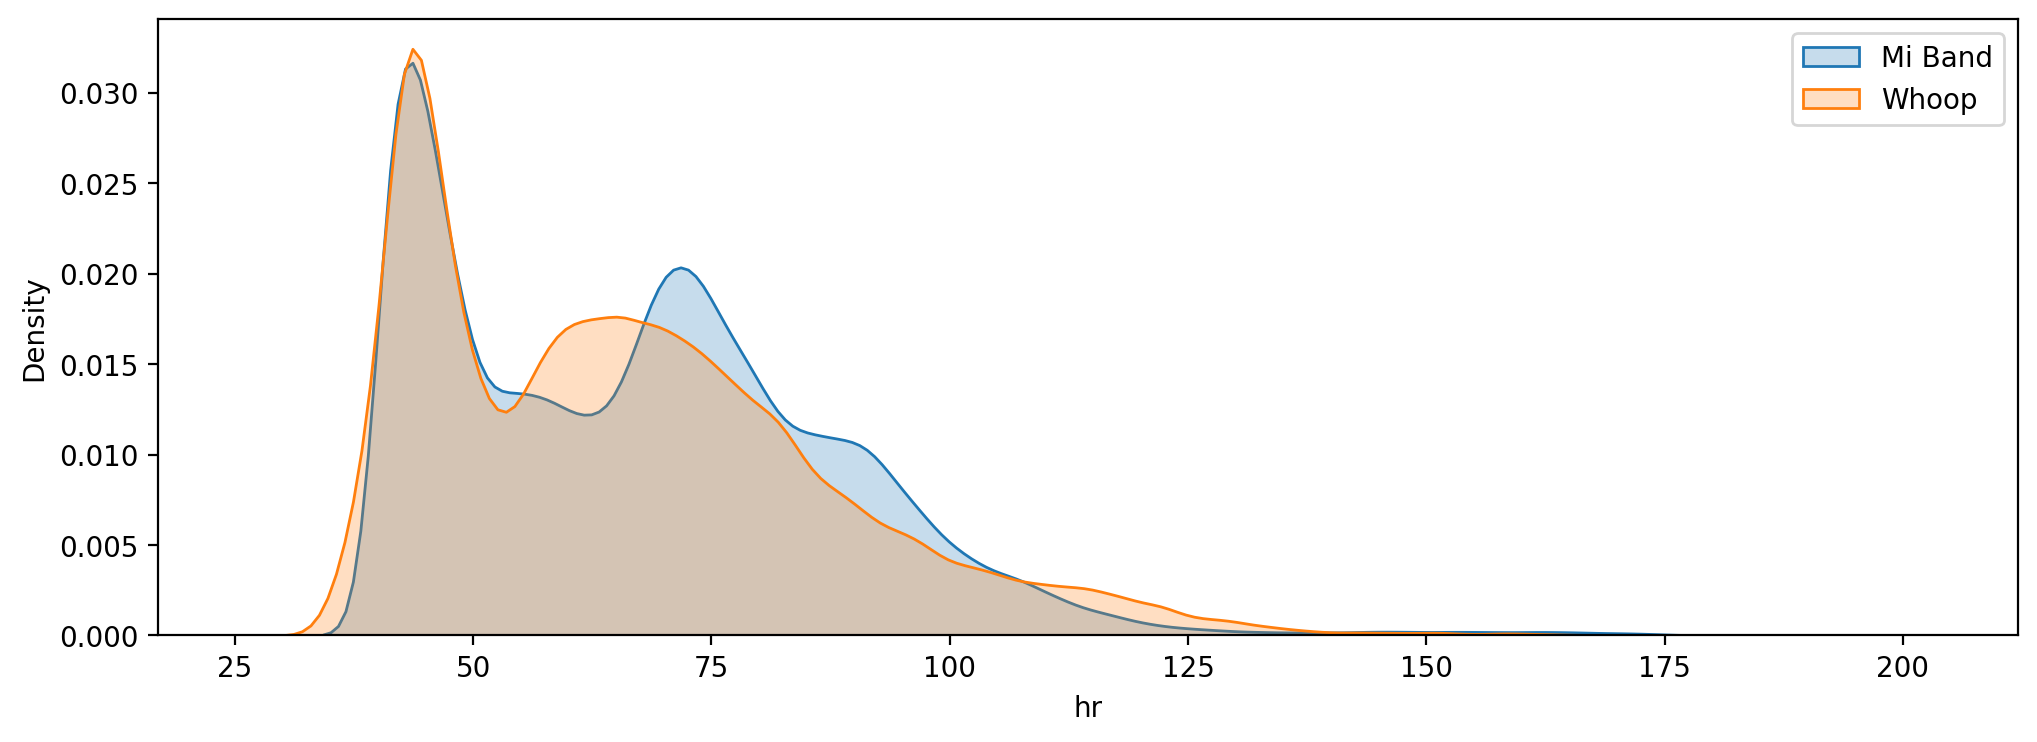

In [177]:
# plotting data distributions

plt.figure(figsize=(12,4))

ax = sns.kdeplot(data=mb_plot_data['hr'], 
            fill=True)

ax = sns.kdeplot(data=wh_plot_data['hr'], 
            fill=True)

ax.legend(['Mi Band', 'Whoop'])

plt.show()

➡ **Both distributions have two peaks that probably correspond to sleep and wake hour measurements**.

**The sleep HR measurements seem more or less the same, while the wake measurements vary substantially across two bands with Mi Band showing higher numbers**.

I noticed the difference mostly during endurance training but cannot attribute such variability of data to any factor.

## ANALYSING WHOOP AND WORKOUT LOG DATA

This is the intersection of data from Whoop band and workout log.

Whoop measured  sleep and intensity scores as well as maximum heartrates for workouts. Workout log has detailed workout descriptions allowing for distinction being made between endurance and non-endurance workouts.

I would like to explore how was my performance during endurance days across different endurance modalities and if endurance work significantly affected sleep quality on subsequent days.

### On which modality of cyclic endurance work did I go the hardest?

Here we are talking about 4 main cyclic endurance work modalities: rowing, skiing, cycling and running.

In order to evaluate training sessions, we will use 2 indicators: `intensity_score` and `max_heart_rate` from `wh_workouts` and cyclic endurance training dates from `workout_log`.

General procedure:
1. Subset workout log data to its intersection with Whoop
2. Make up a list of keywords to search for endurance workouts
3. Filter for endurance workouts and mark them by its corresponding endurance work modality
4. Filter Whoop workout data for logged endurance workouts only and extract `intensity_score` and `max_heart_rate` for those dates
5. Join workout log data with Whoop data
6. Find mean `intensity_score` and `max_heart_rate` within each endurance modality and find the modality with maximal values

In [178]:
# subsetting workout log data to the date range covered by Whoop

wl_plot_data = workout_log.set_index('date').loc[actual_dates]

In [179]:
# defining keywords for endurance training

cyclic_endurance = ['лыж','греб','бег','байк']

In [180]:
# marking days as endurance (True) or not (False)

wl_plot_data['is_cyclic_endurance_day'] = wl_plot_data['content'].str.lower().str.contains('|'.join(cyclic_endurance))

In [181]:
s = wl_plot_data.loc[wl_plot_data['is_cyclic_endurance_day'] == True, 'content']

s.head()

date
2022-12-11    \n\n30 минут бег в равномерном темпе\n\n12-10-...
2022-12-13    \n\n10 раундов (2 разминочных + 8 рабочих)\n1 ...
2022-12-15    \n\nКаждые 3 минуты, 10 раундов\n500 метров лы...
2022-12-18    \n\n6 раундов\n6 минут бег\n2 минуты отдых\n\n...
2022-12-20    \n// продолжаю болеть, состояние ватное\n\nКаж...
Name: content, dtype: object

In [182]:
# using regexp to find matches of workout content with cyclic endurance keywords

s_matches = s.str.findall('|'.join(cyclic_endurance))
s_matches.head()

date
2022-12-11     [бег]
2022-12-13    [байк]
2022-12-15     [лыж]
2022-12-18     [бег]
2022-12-20     [лыж]
Name: content, dtype: object

In [183]:
# getting the first element from each match list given that we have only one match per date

wl_plot_data = s_matches.apply(itemgetter(0)).to_frame()

# mapping values in the resulting list into descriptions in English

endurance_modality_map = {'лыж':'Skiing', 'бег':'Running', 'греб':'Rowing', 'байк':'Cycling'}

# converting the resulting list into a dataframe

wl_plot_data = wl_plot_data['content'].map(endurance_modality_map).to_frame()

wl_plot_data.head()

,content
date,
2022-12-11,Running
2022-12-13,Cycling
2022-12-15,Skiing
2022-12-18,Running
2022-12-20,Skiing


In [184]:
# extracting sport name, intensity score and max HR from Whoop data

wh_plot_data = wh_workouts.loc[:, ['date', 'sport_name', 'intensity_score', 'max_heart_rate']].set_index('date')
wh_plot_data.head()

,sport_name,intensity_score,max_heart_rate
date,,,
2023-04-15,Functional Fitness,5.6649,134
2023-04-13,Cycling,6.6053,162
2023-04-13,Functional Fitness,4.6817,145
2023-04-13,HIIT,6.2411,153
2023-04-12,Functional Fitness,5.3443,135


In [185]:
wh_plot_data['sport_name'].unique()

array(['Functional Fitness', 'Cycling', 'HIIT', 'Commuting', 'Rowing',
       'Skiing', 'Running', 'Swimming', 'Activity', 'Basketball',
       'Cross Country Skiing'], dtype=object)

In [186]:
# subsetting the workout list to cyclic endurance only

wh_plot_data = wh_plot_data[wh_plot_data['sport_name'].isin(['Cycling', 'Rowing', 'Skiing', 'Running'])]
wh_plot_data.head()

,sport_name,intensity_score,max_heart_rate
date,,,
2023-04-13,Cycling,6.6053,162
2023-04-09,Rowing,7.7706,162
2023-04-06,Skiing,8.5473,162
2023-04-04,Cycling,8.3375,171
2023-04-02,Running,10.7928,179


In [187]:
# checking for duplicate dates

wh_plot_data.index.value_counts().head()

2023-01-31    2
2022-12-13    2
2023-01-19    2
2023-01-05    1
2023-01-29    1
Name: date, dtype: int64

In [188]:
# deleting duplicate date rows

wh_plot_data = wh_plot_data.drop(['2023-01-31', '2022-12-13', '2023-01-19'], axis=0, errors='ignore')

In [189]:
# joining two datasets on date index

whwl_plot_data = wl_plot_data.join(wh_plot_data)
whwl_plot_data = whwl_plot_data.dropna()
whwl_plot_data.head()

,content,sport_name,intensity_score,max_heart_rate
date,,,,
2022-12-11,Running,Running,13.3741,174.0
2022-12-15,Skiing,Skiing,11.5575,161.0
2022-12-18,Running,Running,15.8236,184.0
2022-12-22,Rowing,Rowing,11.2177,170.0
2022-12-25,Running,Running,14.0460,166.0


In [190]:
# filtering rows that have the same type of cyclic work from both sources

whwl_plot_data = whwl_plot_data.loc[whwl_plot_data['content'] == whwl_plot_data['sport_name'], ['sport_name', 'intensity_score', 'max_heart_rate']]
whwl_plot_data.head()

,sport_name,intensity_score,max_heart_rate
date,,,
2022-12-11,Running,13.3741,174.0
2022-12-15,Skiing,11.5575,161.0
2022-12-18,Running,15.8236,184.0
2022-12-22,Rowing,11.2177,170.0
2022-12-25,Running,14.0460,166.0


In [191]:
# counting the number of cyclic endurance training by type

whwl_plot_data.groupby('sport_name')['intensity_score'].count().sort_values(ascending=False)

sport_name
Running    11
Skiing     10
Cycling     6
Rowing      6
Name: intensity_score, dtype: int64

In [192]:
# calculating mean intensity score for each cyclic endurance type

whwl_plot_data.groupby('sport_name')['intensity_score'].mean().sort_values(ascending=False)

sport_name
Running    12.395964
Cycling    11.271100
Skiing     10.043760
Rowing      9.198800
Name: intensity_score, dtype: float64

In [193]:
# calculating mean max heart rate for each cyclic endurance type

whwl_plot_data.groupby('sport_name')['max_heart_rate'].mean().sort_values(ascending=False)

sport_name
Running    174.090909
Cycling    169.166667
Rowing     166.833333
Skiing     166.700000
Name: max_heart_rate, dtype: float64

➡ **For the time I wore Whoop I preferred running to other cyclic modalities and obtained highest intensity scores and max heart rates during running**.

### Did my sleep differ depending on training the previous day?

I am interested to contrast two sets of days:
1. Sleep on **days following endurance training** VS sleep on **days following non-endurance training**
2. Sleep on **days following training days** VS sleep on **days following non-training days**

To answer these questions I'll take dates of endurance training from the `workout_log` and `sleep_score` for those days and all other days from `wh_sleeps`.


In [194]:
# setting the actual date range for Whoop dates
actual_dates = dates.set_index('date')['Whoop']

In [195]:
# creating a list of keywords for endurance exercises

endurance = ['лыж','греб','бег','байк','саней', 'ассаулт', 
            'мах', 'бёрпи', 'броск', 'запрыгив', 
            'калори']

# subsetting the data to the date range covered by Whoop

wl_plot_data = workout_log.set_index('date').loc[actual_dates, :]

# marking days as endurance (True) or not (False)

wl_plot_data['is_endurance_day'] = wl_plot_data['content'].str.lower().str.contains('|'.join(endurance))

wl_plot_data.head()

,content,weekday,month,endurance,words,is_endurance_day
date,,,,,,
2022-12-11,\n\n30 минут бег в равномерном темпе\n\n12-10-...,6,12,True,"{'30': 1, 'минут': 1, 'бег': 1, 'в': 1, 'равно...",True
2022-12-12,"\n\nКаждые 2 минуты, 10 раундов\n150х5/165х2/1...",0,12,True,"{'Каждые': 1, '2': 3, 'минуты,': 1, '10': 3, '...",True
2022-12-13,\n\n10 раундов (2 разминочных + 8 рабочих)\n1 ...,1,12,True,"{'10': 1, 'раундов': 1, '(2': 1, 'разминочных'...",True
2022-12-15,"\n\nКаждые 3 минуты, 10 раундов\n500 метров лы...",3,12,True,"{'Каждые': 1, '3': 2, 'минуты,': 1, '10': 3, '...",True
2022-12-16,"\n\nКаждые 5 минут, 6 раундов\n6 присед со шта...",4,12,False,"{'Каждые': 1, '5': 1, 'минут,': 1, '6': 3, 'ра...",False


In [196]:
# extracting sleep scores for all days

wh_plot_data = wh_sleep.loc[:, ['date', 'score']].set_index('date')
wh_plot_data.head()

,score
date,
2023-04-15,75
2023-04-14,46
2023-04-13,79
2023-04-12,68
2023-04-11,84


In [197]:
# calculating days after endurance training

one_day = pd.Timedelta(1, 'd')
days_after_endurance_training = wl_plot_data.loc[wl_plot_data['is_endurance_day'], :].index + one_day
days_after_endurance_training.shape[0]

48

In [198]:
# calculating days after non-endurance training

days_after_nonendurance_training = wl_plot_data.index.difference(days_after_endurance_training)
days_after_nonendurance_training.shape[0]

62

In [199]:
# calculating days after all training days

days_after_all_training_days = days_after_endurance_training.union(days_after_nonendurance_training)
days_after_all_training_days.shape[0]

110

In [200]:
# calculating days after non-training days

days_after_nontraining_days = wh_plot_data.index.difference(days_after_all_training_days)
days_after_nontraining_days.shape[0]

17

So, there were **total of 127 days**:

- **110 training days (48 endurance + 68 non-endurance training days)**
- **17 non-training days**

In [201]:
# comparing sleep after endurance days and other training days

print(f'{"After endurance training":<35}{"n="+str(wh_plot_data.loc[days_after_endurance_training].count()[0]):<10}{wh_plot_data.loc[days_after_endurance_training].mean()[0]:<10.2f}')
print(f'{"After non-endurance training":<35}{"n="+str(wh_plot_data.loc[days_after_nonendurance_training].count()[0]):<10}{wh_plot_data.loc[days_after_nonendurance_training].mean()[0]:<10.2f}')

After endurance training           n=48      74.88     
After non-endurance training       n=62      77.37     


In [202]:
# comparing sleep after all training days and non-training days


print(f'{"After all training days":<35}{"n="+str(wh_plot_data.loc[days_after_all_training_days].count()[0]):<10}{wh_plot_data.loc[days_after_all_training_days].mean()[0]:<10.2f}')
print(f'{"After non-training days":<35}{"n="+str(wh_plot_data.loc[days_after_nontraining_days].count()[0]):<10}{wh_plot_data.loc[days_after_nontraining_days].mean()[0]:<10.2f}')


After all training days            n=110     76.28     
After non-training days            n=17      81.00     


➡ **Endurance training seem to lower my sleep scores by about 2.5%**

While the difference between training and non-training is even bigger (5.7%) I would obstain from conclusions as sample counts are much higher for days after training days (110) versus days after non-training days (17)

## Conclusions

In this portfolio project I showcased some of my current abilities as data analyst.

I used data exported from two wearable fitness bands and one manually typed text file. With this data I tried to bring in insights about my personal health beyond the ones offered by each device and resource by default.

In order to perform the analysis I imported, cleaned and transformed the data.\
Then I looked at date ranges covered by each source and decided which source combinations to use.\
After that I came up with a bunch of questions to ask the data: I was interrested in aggregated statistics, correlations, distrubutions, most frequent words etc.

To answer those questions in text and/or graph, behind the scenes I used multiple techniques:
- parsed text and dates;
- joined datasets;
- filtered, grouped, aggregated and sorted values;
- identificated duplicated, missing and outlier values;
- turned quantitative data into categories etc.

Stopping my curiosity turned into a challenge: there always was an infinity of possible options to go on with. Hopefully, the questions that I made were interesting enough.

I also hope that this portfolio project reflects how passionate I am for health and fitness related data analytics.
I am ready to direct all my effort to work here further and open to job opportunities.

*May 2023*








